### Analysis time gaps data

In [258]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp



In [259]:
plt.rc('legend', fontsize=20) # using a size in points
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rcParams['axes.labelsize'] = 16

In [260]:
# load opsim database
dbpath_v15 = "/home/idies/workspace/lsst_cadence/FBS_1.5/"  # path to all opsim databases

dbpath_v17 = "/home/idies/workspace/lsst_cadence/FBS_1.7/"


# output directory
dataRawDir = '/home/idies/workspace/Temporary/lixl/scratch/outDir/dataRaw/'


In [261]:
# get the name of all opsim dbs 
import glob

workpath = os.getcwd()
#workpath = '/home/idies/workspace/Storage/lixl/persistent/LSST_OpSim/unknowns'

os.chdir(dbpath)  # change to opsim database directory
dblist_all_v15 = glob.glob('*.db') 

os.chdir(dbpath_v17)  # change to opsim database directory
dblist_all_v17 = glob.glob('*.db') 

os.chdir(workpath) # change back to work directory
dblist_all_v15.sort()
dblist_all_v17.sort()



In [264]:
fltpairs = ['uu', 'ug', 'ur', 'ui', 'uz', 'uy', 'gg', 'gr', 'gi', 'gz', 'gy',
           'rr', 'ri', 'rz', 'ry', 'ii', 'iz', 'iy', 'zz', 'zy', 'yy' ]

fltpairs_db = ['db','uu', 'ug', 'ur', 'ui', 'uz', 'uy', 'gg', 'gr', 'gi', 'gz', 'gy',
           'rr', 'ri', 'rz', 'ry', 'ii', 'iz', 'iy', 'zz', 'zy', 'yy' ]

### tgaps distribution any filter only neighbor visits

In [265]:
msname= 'WFD'

dbname = dblist_all_v17[0]

dataRaw = pd.read_pickle(dataRawDir+'/tgaps_any_{}_{}.pkl'.format(dbname,msname))

df = dataRaw[dbname]['any']
df.head()

,pixId,Nv,dT_lim
0,1376,273,"[0.014683171386423055, 0.9577475206970121, 0.0..."
1,1377,242,"[0.0003819444391410798, 0.0003819444391410798,..."
2,1378,267,"[0.015825953465537168, 1.8621401760028675, 0.0..."
3,1379,287,"[0.01451264180650469, 9.869761233203462, 0.015..."
4,1380,241,"[0.01451340989297023, 1.9892164800548926, 0.01..."


In [266]:
dT_lim = np.concatenate( df.dT_lim.values )

In [267]:
dT_lim.shape

(1300760,)

Text(0.5, 1.0, 'gaps between neighbor visits')

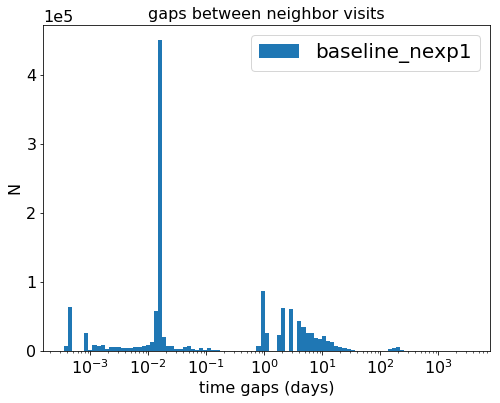

In [268]:
tmin = 30/60/60/24 # in days
#tmax = 3e8/60./60./24  
tmax = 3e8/60./60./24  
# histogram in log space
bins=np.logspace(np.log10(tmin), np.log10(tmax), 100)
 
#bins=np.linspace(tmin, tmax, 200)

plt.figure(figsize=(8,6))
plt.hist(dT_lim, bins=bins);
plt.xscale('log')
#plt.xlim([0, 5/60/60/24 ])
plt.xlabel("time gaps (days)")
plt.ylabel("N")
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.legend(["baseline_nexp1"])
plt.title("gaps between neighbor visits", fontdict={"fontsize":16})



### tgaps distribution any filter all gaps

In [269]:
msname= 'WFD'

dbname = dblist_all_v17[0]

dataRaw = pd.read_pickle(dataRawDir+'/tgaps_any_all_{}_{}.pkl'.format(dbname,msname))

df = dataRaw[dbname]['any']
df.head()

,pixId,Nv,dT_lim
0,1376,2080,"[0.014683171386423055, 0.9724306920834351, 0.9..."
1,1377,2415,"[0.0003819444391410798, 0.0007638888782821596,..."
2,1378,1653,"[0.015825953465537168, 1.8779661294684047, 1.8..."
3,1379,2080,"[0.01451264180650469, 9.884273875009967, 9.869..."
4,1380,1485,"[0.01451340989297023, 2.003729889947863, 1.989..."


In [270]:
dT_lim = np.concatenate( df.dT_lim.values )

Text(0.5, 1.0, 'allgaps within 2yrs')

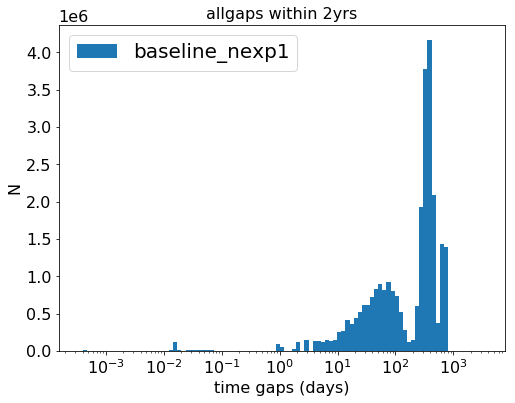

In [271]:
tmin = 30/60/60/24 # in days
#tmax = 3e8/60./60./24  
tmax = 3e8/60./60./24  
# histogram in log space
bins=np.logspace(np.log10(tmin), np.log10(tmax), 100)
 
#bins=np.linspace(tmin, tmax, 200)

plt.figure(figsize=(8,6))
plt.hist(dT_lim, bins=bins);
plt.xscale('log')
#plt.xlim([0, 5/60/60/24 ])
plt.xlabel("time gaps (days)")
plt.ylabel("N")
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.legend(["baseline_nexp1"])
plt.title("allgaps within 2yrs", fontdict={"fontsize":16})

In [139]:
cols_same = [ 'uu',  'gg',  'rr',  'ii',  'zz',  'yy']

cols_diff = ['ug', 'ur', 'ui', 'uz', 'uy', 'gr', 'gi', 'gz', 'gy', 'ri', 'rz', 'ry', 'iz', 'iy', 'zy']



In [140]:
dT_all = []
for flt in cols_diff:
    dT_lim = dataRaw[dbname][flt].dT_lim.values
    #dT_lim = dataRaw[dbname][flt].iloc[0].dT_lim
    
    dT_all.append( np.concatenate(dT_lim) )
    print( dT_lim.shape )
    
dT_all = np.concatenate(dT_all)

(1459,)
(1460,)
(1463,)
(1463,)
(1461,)
(1460,)
(1463,)
(1463,)
(1461,)
(1463,)
(1463,)
(1461,)
(1463,)
(1463,)
(1463,)


In [141]:
dT_all.shape

(882955,)

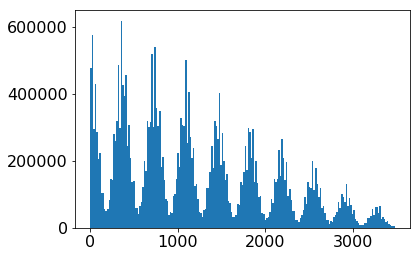

In [79]:
tmin = 5/60/60/24 # in days
tmax = 3e8/60./60./24    
# histogram in log space
#bins=np.logspace(np.log10(tmin), np.log10(tmax), 50)
 
bins=np.linspace(tmin, tmax, 200)


plt.hist(np.concatenate(df.dT_lim), bins=bins);
#plt.xscale('log')

In [137]:
dT_all.shape

(115215562,)

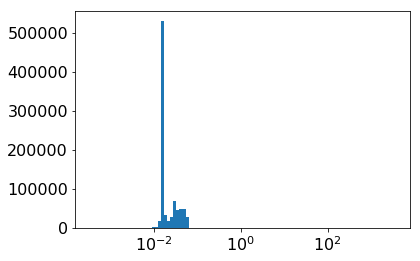

In [142]:
tmin = 30/60/60/24 # in days
#tmax = 3e8/60./60./24  
tmax = 3e8/60./60./24  
# histogram in log space
bins=np.logspace(np.log10(tmin), np.log10(tmax), 100)
 
#bins=np.linspace(tmin, tmax, 200)

plt.hist(dT_all, bins=bins);
plt.xscale('log')
#plt.xlim([0, 5/60/60/24 ])

In [ ]:
tmin = 5/60/60/24 # in days
tmax = 3e8/60./60./24    
# histogram in log space
#bins=np.logspace(np.log10(tmin), np.log10(tmax), 50)
 
bins=np.linspace(tmin, tmax, 200)


plt.hist(np.concatenate(df.dT_lim), bins=bins);
#plt.xscale('log')

### compare with ideal distribution 

In [56]:
def get_Dkl(values):
    '''kl divergence for histogram'''
    if values.any():
        values = values + 0.00001  # make each element non-zero
        prob = (values) / values.sum()  
    
        prob_uni = np.ones( len(prob) ) / len(prob)
        return np.sum( prob_uni * np.log(prob_uni / prob) )
    
    else:
        return np.NaN

def get_FoM_tgaps(df, tmin=0, tmax=1.5/24, bins=50, unit="day"):
    """return FoM from array of metricValues
    Inputs:
     df: pd.DataFrame, cols ['pixId', 'Dkl', 'FoM_i', 'Nv', 'dT_lim']
    """
    dic = {"day": 1, "hour": 24, "min":24*60 }
    dT_all = np.concatenate(df.dT_lim.values) * dic[unit] 
    
    dT_tlim = dT_all[(dT_all>tmin)&(dT_all<tmax)] 
    Nv = len(dT_tlim)

    values, bins_ = np.histogram(dT_tlim, bins=bins);

    Dkl = get_Dkl(values)

    FoM = Nv * np.exp(-Dkl)
    
    return FoM, Nv, Dkl



In [60]:
 fltpairs.append('db')

### uniform in log space for both same and different filterpairs

In [72]:

msname= 'WFD'

df_FoMtgaps = pd.DataFrame(columns=fltpairs_db)


for dbname in dblist_all:

    dataRaw = pd.read_pickle(dataRawDir+'/tgaps_{}_{}.pkl'.format(dbname,msname))
    
    dicFom = {}

    dicFom['db'] = dbname
    
    for fltpair in fltpairs:
        df = dataRaw[dbname][fltpair]
    
        if fltpair[0]==fltpair[1]:
            tmin = 5/60/60/24 # in days
            tmax = 3e8/60./60./24    
            # histogram in log space
            bins=np.logspace(np.log10(tmin), np.log10(tmax), 50)
            
            FoM_tgaps, Nv, Dkl = get_FoM_tgaps(df=df, tmin=tmin, tmax=tmax, bins=bins)
           
        else:
            #tmin = 5/60/60/24
            #tmax = 1.5/24 # 1.5 hour in days
            
            tmin = 5/60 # in min
            tmax = 1.5 * 60
    
            bins=np.logspace(np.log10(tmin), np.log10(tmax), 50)
            FoM_tgaps, Nv, Dkl = get_FoM_tgaps(df=df, tmin=tmin, tmax=tmax, bins=bins, unit="min")
        
        dicFom[fltpair] = FoM_tgaps
        print(dbname, fltpair, FoM_tgaps, Nv, Dkl, np.exp(-Dkl))
        
    df_FoMtgaps = df_FoMtgaps.append(dicFom, ignore_index=True)
    
        
df_FoMtgaps.to_csv("./data/df_tgaps_log_v1.5.csv", index=False)



agnddf_v1.5_10yrs.db uu 10773.203214912399 2528438 5.458295132664604 0.004260813678212556
agnddf_v1.5_10yrs.db ug 2.8467603467892073 69489 10.102742118345994 4.0967064525165236e-05
agnddf_v1.5_10yrs.db ur 3.265939184405198 67903 9.942288121636347 4.80971265541316e-05
agnddf_v1.5_10yrs.db ui 2.1816314392758716 9606 8.390070218670148 0.0002271113303431055
agnddf_v1.5_10yrs.db uz nan 0 nan nan
agnddf_v1.5_10yrs.db uy 0.04146160732849812 100 7.788157590539963 0.0004146160732849812
agnddf_v1.5_10yrs.db gg 20040.48514311779 5227382 5.563911373454355 0.003833751798341462
agnddf_v1.5_10yrs.db gr 4.051621966179565 125596 10.341708398953367 3.225916403531613e-05
agnddf_v1.5_10yrs.db gi 1.066190769024014 23675 10.008082650513021 4.503445698095096e-05
agnddf_v1.5_10yrs.db gz 0.6099231397965749 1004 7.406169630338647 0.0006074931671280627
agnddf_v1.5_10yrs.db gy 0.40108268419864423 340 6.742533295531956 0.0011796549535254242
agnddf_v1.5_10yrs.db rr 87894.19107173376 28863192 5.79418871226084 0.0030

baseline_samefilt_v1.5_10yrs.db gg 30871.510283320098 5770410 5.230664652870885 0.005349968248932069
baseline_samefilt_v1.5_10yrs.db gr 1.2074953616322168 3969 8.097721187544224 0.00030423163558382886
baseline_samefilt_v1.5_10yrs.db gi 1.0393852064225255 3244 8.045933024549345 0.00032040234476649987
baseline_samefilt_v1.5_10yrs.db gz 0.4629400479031254 1059 7.735238065051723 0.00043714829830323454
baseline_samefilt_v1.5_10yrs.db gy 0.21073950597992183 895 8.35395619530435 0.00023546313517309702
baseline_samefilt_v1.5_10yrs.db rr 99934.51746649349 31054342 5.738978770393197 0.003218052968776266
baseline_samefilt_v1.5_10yrs.db ri 2.549156676776334 12407 8.490253518960472 0.00020546116521127862
baseline_samefilt_v1.5_10yrs.db rz 0.9954865202486093 2500 7.828569707110325 0.00039819460809944373
baseline_samefilt_v1.5_10yrs.db ry 0.4907102007832166 1750 8.179272614792447 0.0002804058290189809
baseline_samefilt_v1.5_10yrs.db ii 59179.881976289595 31052393 6.262849500982537 0.00190580745182149

bulges_cadence_bs_v1.5_10yrs.db rr 71908.47998539844 21256649 5.689030820374137 0.003382869989780536
bulges_cadence_bs_v1.5_10yrs.db ri 4.91151353827417 148008 10.31343945476656 3.3184108550038986e-05
bulges_cadence_bs_v1.5_10yrs.db rz 0.9488766048376274 10645 9.325322092668587 8.913824376116743e-05
bulges_cadence_bs_v1.5_10yrs.db ry 0.6642813379637467 1254 7.5431432386821795 0.0005297299345803403
bulges_cadence_bs_v1.5_10yrs.db ii 45354.67962001193 21422915 6.157703062298646 0.0021171105622186303
bulges_cadence_bs_v1.5_10yrs.db iz 4.800136846541796 163351 10.435012111631123 2.938541451562461e-05
bulges_cadence_bs_v1.5_10yrs.db iy 2.5253944605304786 27709 9.303115276632774 9.113986287958709e-05
bulges_cadence_bs_v1.5_10yrs.db zz 47236.87473573652 17191421 5.89699092731997 0.0027477004219567725
bulges_cadence_bs_v1.5_10yrs.db zy 4.606657022690639 139711 10.319828846115962 3.297275821295846e-05
bulges_cadence_bs_v1.5_10yrs.db yy 71122.6862078731 19222466 5.599428617574871 0.0036999772145

daily_ddf_v1.5_10yrs.db rr 79666.20200773687 26404646 5.803449827791852 0.003017128198110926
daily_ddf_v1.5_10yrs.db ri 5.2182327155194015 160975 10.336845568081621 3.241641693132102e-05
daily_ddf_v1.5_10yrs.db rz 0.7802457369427731 11416 9.590917520709642 6.834668333416022e-05
daily_ddf_v1.5_10yrs.db ry 0.5819551340053127 1660 7.9559348049107745 0.00035057538193091126
daily_ddf_v1.5_10yrs.db ii 69615.67735780975 26728950 5.950512735286114 0.002604504754500635
daily_ddf_v1.5_10yrs.db iz 5.34368652432892 195166 10.505689982317877 2.7380212354246745e-05
daily_ddf_v1.5_10yrs.db iy 2.363847617485316 30759 9.47364727548054 7.685060039290341e-05
daily_ddf_v1.5_10yrs.db zz 73381.0410933477 21359782 5.673599480504116 0.0034354770612053855
daily_ddf_v1.5_10yrs.db zy 4.986065548857527 156945 10.357003572886372 3.176950873782234e-05
daily_ddf_v1.5_10yrs.db yy 80015.5457988956 23572127 5.685599295409558 0.003394498332666187
dcr_nham1_ug_v1.5_10yrs.db uu 19416.815251565662 2567039 4.88436891739826 

dcr_nham2_ug_v1.5_10yrs.db ii 58433.054786867964 29273431 6.21655385547458 0.0019961122694113977
dcr_nham2_ug_v1.5_10yrs.db iz 5.243307860996264 197284 10.535447023595218 2.6577461228463862e-05
dcr_nham2_ug_v1.5_10yrs.db iy 2.9884591516603387 36748 9.417081160711772 8.13230421154985e-05
dcr_nham2_ug_v1.5_10yrs.db zz 72832.39626010676 23341766 5.769838707283326 0.0031202607489127757
dcr_nham2_ug_v1.5_10yrs.db zy 5.165462776776941 178901 10.452593162036688 2.887330298196735e-05
dcr_nham2_ug_v1.5_10yrs.db yy 69826.17539779683 25918209 5.916692105686307 0.0026940972425138184
dcr_nham2_ugr_v1.5_10yrs.db uu 21600.576512074254 2797023 4.863590911556579 0.007722702499076431
dcr_nham2_ugr_v1.5_10yrs.db ug 2.109299790628096 36756 9.765700716991013 5.738654343857046e-05
dcr_nham2_ugr_v1.5_10yrs.db ur 2.482057754561074 42309 9.743667152484813 5.866500637124663e-05
dcr_nham2_ugr_v1.5_10yrs.db ui 1.683314821885217 5926 8.16633977047469 0.00028405582549531166
dcr_nham2_ugr_v1.5_10yrs.db uz nan 0 nan 

filterdist_indx1_v1.5_10yrs.db yy 62396.7311370239 22615356 5.892871535173769 0.0027590426229427427
filterdist_indx2_v1.5_10yrs.db uu 16568.298503359212 3045817 5.214033312066093 0.005439689417768438
filterdist_indx2_v1.5_10yrs.db ug 3.007703089907783 77889 10.16186332080983 3.861524849346869e-05
filterdist_indx2_v1.5_10yrs.db ur 3.5003846868367274 79106 10.025671131248787 4.424929445094844e-05
filterdist_indx2_v1.5_10yrs.db ui 2.45991985353313 11068 8.411684571357862 0.00022225513674856614
filterdist_indx2_v1.5_10yrs.db uz nan 0 nan nan
filterdist_indx2_v1.5_10yrs.db uy 0.041326685509285824 49 7.078067147543846 0.0008434017450874658
filterdist_indx2_v1.5_10yrs.db gg 23132.6190291946 6440865 5.629174426181494 0.0035915391844410028
filterdist_indx2_v1.5_10yrs.db gr 4.4007033020300526 147206 10.417823875794365 2.9894863674239178e-05
filterdist_indx2_v1.5_10yrs.db gi 1.6234705661873792 30296 9.83420478703592 5.3586960859102826e-05
filterdist_indx2_v1.5_10yrs.db gz 0.9420076539998191 1285 

filterdist_indx6_v1.5_10yrs.db uu 10909.549307138797 2452153 5.415083204229916 0.004448967624425881
filterdist_indx6_v1.5_10yrs.db ug 3.3006553220158295 94762 10.26500273281528 3.483100105544237e-05
filterdist_indx6_v1.5_10yrs.db ur 2.7215883586693517 48038 9.778531978088482 5.665490567195453e-05
filterdist_indx6_v1.5_10yrs.db ui 1.9939055125801477 7258 8.199764303223644 0.0002747183125627098
filterdist_indx6_v1.5_10yrs.db uz nan 0 nan nan
filterdist_indx6_v1.5_10yrs.db uy 0.035208122932402885 111 8.056008659187514 0.0003171902966883143
filterdist_indx6_v1.5_10yrs.db gg 29213.45175778792 5235138 5.188519204156806 0.005580263931492908
filterdist_indx6_v1.5_10yrs.db gr 3.7459694457764137 109130 10.279614663611719 3.432575319139021e-05
filterdist_indx6_v1.5_10yrs.db gi 0.4572243656923632 23742 10.857581965804615 1.9258039158131715e-05
filterdist_indx6_v1.5_10yrs.db gz 0.43489665815823164 388 6.793652183192685 0.0011208676756655454
filterdist_indx6_v1.5_10yrs.db gy 0.048261179580452215 146

footprint_big_sky_dustv1.5_10yrs.db uu 13219.452164249748 2280063 5.1502689595014 0.00579784513158178
footprint_big_sky_dustv1.5_10yrs.db ug 2.8351948057042757 66806 10.067437526497296 4.243922410718013e-05
footprint_big_sky_dustv1.5_10yrs.db ur 3.0722373203951787 64112 9.945980767841533 4.791984839648083e-05
footprint_big_sky_dustv1.5_10yrs.db ui 2.188631737630239 8454 8.259118409890808 0.0002588871229749514
footprint_big_sky_dustv1.5_10yrs.db uz nan 0 nan nan
footprint_big_sky_dustv1.5_10yrs.db uy 0.04400852785865238 114 7.859570297268694 0.00038603971805835417
footprint_big_sky_dustv1.5_10yrs.db gg 24036.926836934173 5032792 5.344138912588859 0.004776062042089991
footprint_big_sky_dustv1.5_10yrs.db gr 4.082665466327196 125909 10.336564627104742 3.242552531055918e-05
footprint_big_sky_dustv1.5_10yrs.db gi 1.3675561597272026 24805 9.805775202822199 5.513227815872617e-05
footprint_big_sky_dustv1.5_10yrs.db gz 0.8521818383473145 1040 7.106931341769902 0.0008194056137954947
footprint_big

footprint_big_wfdv1.5_10yrs.db yy 64591.2244505641 23066577 5.878061408504504 0.0028002084769909335
footprint_bluer_footprintv1.5_10yrs.db uu 12841.82799255864 2569369 5.298707967300874 0.004998047377608525
footprint_bluer_footprintv1.5_10yrs.db ug 3.732867756280385 125295 10.421249462141066 2.9792631440044575e-05
footprint_bluer_footprintv1.5_10yrs.db ur 2.3001656988208476 23334 9.224685640078082 9.857571350050775e-05
footprint_bluer_footprintv1.5_10yrs.db ui 1.272895693125998 2115 7.41551571310509 0.0006018419352841598
footprint_bluer_footprintv1.5_10yrs.db uz nan 0 nan nan
footprint_bluer_footprintv1.5_10yrs.db uy 0.0008295165103684077 8 9.174109086211201 0.00010368956379605096
footprint_bluer_footprintv1.5_10yrs.db gg 70971.37996732084 21366442 5.707300142641544 0.0033216283725348767
footprint_bluer_footprintv1.5_10yrs.db gr 5.819940276171789 260027 10.707250750895332 2.2382061386593657e-05
footprint_bluer_footprintv1.5_10yrs.db gi 2.2187241768019255 31921 9.57408704384445 6.950672

footprint_newBv1.5_10yrs.db yy 56534.79907332975 19164091 5.825937185120237 0.0029500381246013573
footprint_no_gp_northv1.5_10yrs.db uu 15008.476238864316 2505174 5.117498348090382 0.005990991539455669
footprint_no_gp_northv1.5_10yrs.db ug 2.918196157563113 71190 10.102141966965718 4.099165834475506e-05
footprint_no_gp_northv1.5_10yrs.db ur 3.1947243034178325 66124 9.93778625207667 4.831414166441583e-05
footprint_no_gp_northv1.5_10yrs.db ui 2.286324397128806 9119 8.29116996662315 0.0002507209559303439
footprint_no_gp_northv1.5_10yrs.db uz nan 0 nan nan
footprint_no_gp_northv1.5_10yrs.db uy 0.004637202396595676 23 8.509138242277748 0.00020161749550415986
footprint_no_gp_northv1.5_10yrs.db gg 27142.41976849359 5370075 5.287499344702824 0.005054383741101119
footprint_no_gp_northv1.5_10yrs.db gr 4.081716800881691 127453 10.348985263728924 3.2025270498785364e-05
footprint_no_gp_northv1.5_10yrs.db gi 1.1747734499612013 24732 9.954777910215952 4.7500139493821824e-05
footprint_no_gp_northv1.5_

goodseeing_gi_v1.5_10yrs.db zz 80166.98619615517 23492354 5.680318498803932 0.0034124714022338997
goodseeing_gi_v1.5_10yrs.db zy 5.168219630700293 160297 10.342255359735175 3.224152436227935e-05
goodseeing_gi_v1.5_10yrs.db yy 89072.87916482174 25973915 5.675393142497482 0.0034293204996174716
goodseeing_gri_v1.5_10yrs.db uu 11551.437695397866 2512447 5.382202552604118 0.004597684128420566
goodseeing_gri_v1.5_10yrs.db ug 2.8865056604461308 67962 10.06665734790504 4.2472347200584604e-05
goodseeing_gri_v1.5_10yrs.db ur 3.227006571623868 66217 9.929137557023662 4.873380811006038e-05
goodseeing_gri_v1.5_10yrs.db ui 2.0897520218391183 7985 8.248274651549584 0.00026170970843320207
goodseeing_gri_v1.5_10yrs.db uz nan 0 nan nan
goodseeing_gri_v1.5_10yrs.db uy 0.015046959171958446 75 8.51406747011294 0.00020062612229277928
goodseeing_gri_v1.5_10yrs.db gg 21302.406635504005 5330967 5.5224678726802745 0.003995974207963397
goodseeing_gri_v1.5_10yrs.db gr 4.133920824600225 125256 10.318888613164772 3

greedy_footprint_v1.5_10yrs.db uu 11238.505111160744 2508390 5.408050553662974 0.0044803659363818
greedy_footprint_v1.5_10yrs.db ug 2.9918262345161373 74670 10.124949702303185 4.006731263581274e-05
greedy_footprint_v1.5_10yrs.db ur 3.196317223886104 63857 9.902402207887924 5.005429669239244e-05
greedy_footprint_v1.5_10yrs.db ui 2.221353862374325 8352 8.23213945220354 0.0002659666980812171
greedy_footprint_v1.5_10yrs.db uz nan 0 nan nan
greedy_footprint_v1.5_10yrs.db uy 0.0006194756396805537 1 7.386637180217779 0.0006194756396805537
greedy_footprint_v1.5_10yrs.db gg 27391.020161016597 5291487 5.263639353431859 0.0051764315325761165
greedy_footprint_v1.5_10yrs.db gr 4.068388444408233 122717 10.314389208972244 3.315260676522596e-05
greedy_footprint_v1.5_10yrs.db gi 1.502013510093269 22299 9.605490565356048 6.735788645648993e-05
greedy_footprint_v1.5_10yrs.db gz 0.6788925414468512 772 7.03627697399202 0.0008793944837394446
greedy_footprint_v1.5_10yrs.db gy 0.40400574871859307 330 6.7054188

rolling_mod2_sdf_0.20_v1.5_10yrs.db yy 76206.72354490755 26322772 5.844740004744965 0.0028950873238163346
rolling_mod3_sdf_0.10_v1.5_10yrs.db uu 16330.318594827344 2531436 5.043518593057294 0.0064510098595529745
rolling_mod3_sdf_0.10_v1.5_10yrs.db ug 3.201896733540751 80196 10.128485553856493 3.992589073695385e-05
rolling_mod3_sdf_0.10_v1.5_10yrs.db ur 3.170038724945467 63537 9.905633888470012 4.989279828990143e-05
rolling_mod3_sdf_0.10_v1.5_10yrs.db ui 2.303192454373067 9511 8.325908118321165 0.00024216091413868857
rolling_mod3_sdf_0.10_v1.5_10yrs.db uz nan 0 nan nan
rolling_mod3_sdf_0.10_v1.5_10yrs.db uy 0.058258123747889405 119 7.621995225888904 0.0004895640651083143
rolling_mod3_sdf_0.10_v1.5_10yrs.db gg 33026.661585052505 5630537 5.13864493637888 0.005865632635937302
rolling_mod3_sdf_0.10_v1.5_10yrs.db gr 4.2100136153773144 130040 10.338131492672412 3.237475865408578e-05
rolling_mod3_sdf_0.10_v1.5_10yrs.db gi 1.6978424319515486 26179 9.64335455431342 6.485512937665872e-05
rolling_

rolling_mod6_sdf_0.20_v1.5_10yrs.db zz 124343.18071459509 23586436 5.245381750724025 0.005271808793604726
rolling_mod6_sdf_0.20_v1.5_10yrs.db zy 6.239642929383623 195064 10.35016003093771 3.198767035118537e-05
rolling_mod6_sdf_0.20_v1.5_10yrs.db yy 135897.87906524385 28814378 5.356726063206878 0.004716321798278756
short_exp_2ns_1expt_v1.5_10yrs.db uu 87536.03767087866 3319049 3.6353830074253244 0.02637383107958896
short_exp_2ns_1expt_v1.5_10yrs.db ug 5.624760416312694 84925 9.622345438500915 6.623209203782978e-05
short_exp_2ns_1expt_v1.5_10yrs.db ur 6.279934709043867 92496 9.597561095545261 6.789412200575016e-05
short_exp_2ns_1expt_v1.5_10yrs.db ui 4.08420227245227 12788 8.049136083079233 0.00031937771914703394
short_exp_2ns_1expt_v1.5_10yrs.db uz nan 0 nan nan
short_exp_2ns_1expt_v1.5_10yrs.db uy 0.002158689217819402 17 8.971467429148513 0.00012698171869525893
short_exp_2ns_1expt_v1.5_10yrs.db gg 112683.63055621684 6897056 4.1142657703227234 0.016337931801078148
short_exp_2ns_1expt_v1

short_exp_5ns_5expt_v1.5_10yrs.db zz 345798.9732455365 37712155 4.691880131235024 0.009169430207463258
short_exp_5ns_5expt_v1.5_10yrs.db zy 12.151671779937805 283615 10.057906208259906 4.2845659714534866e-05
short_exp_5ns_5expt_v1.5_10yrs.db yy 284765.1340430105 41108079 4.9722952010683965 0.006927230388046361
spiders_v1.5_10yrs.db uu 10981.278018606743 2460308 5.411849999895946 0.004463375324799473
spiders_v1.5_10yrs.db ug 2.9390257503879376 70886 10.090750082795319 4.146130054436613e-05
spiders_v1.5_10yrs.db ur 3.1427184625105467 65407 9.943296387592127 4.804865629841679e-05
spiders_v1.5_10yrs.db ui 2.222147247111847 8805 8.28460106408137 0.0002523733386839122
spiders_v1.5_10yrs.db uz nan 0 nan nan
spiders_v1.5_10yrs.db uy 0.003502793502853119 16 8.426783207401511 0.00021892459392831994
spiders_v1.5_10yrs.db gg 20099.18743636341 5335057 5.581375459643675 0.003767380074170418
spiders_v1.5_10yrs.db gr 4.137880749020414 127372 10.334683457343543 3.248658063797706e-05
spiders_v1.5_10yrs.

third_obs_pt45v1.5_10yrs.db gg 28085.990003033166 5322277 5.244385622680753 0.005277062806583191
third_obs_pt45v1.5_10yrs.db gr 4.194749144093932 128962 10.333439526959623 3.252701682739049e-05
third_obs_pt45v1.5_10yrs.db gi 1.605465537083272 24206 9.620942046516683 6.632510687776881e-05
third_obs_pt45v1.5_10yrs.db gz 0.7240052089059836 791 6.996254659768431 0.000915303677504404
third_obs_pt45v1.5_10yrs.db gy 0.4357457537962811 483 7.010712992868906 0.0009021651217314308
third_obs_pt45v1.5_10yrs.db rr 99691.23972590944 29248154 5.681493932789907 0.0034084626238602765
third_obs_pt45v1.5_10yrs.db ri 5.549852545037604 185881 10.419090604055675 2.9857018980087283e-05
third_obs_pt45v1.5_10yrs.db rz 1.3473899311408892 14155 9.259653860835726 9.518826783051143e-05
third_obs_pt45v1.5_10yrs.db ry 0.6990247152350069 1918 7.917107434826794 0.0003644550131569379
third_obs_pt45v1.5_10yrs.db ii 61910.49274792426 29536184 6.167681690368815 0.00209608975715767
third_obs_pt45v1.5_10yrs.db iz 5.43177675

twilight_neo_mod2_v1.5_10yrs.db rr 1641087.5614839473 40981220 3.21775474368999 0.04004486839298457
twilight_neo_mod2_v1.5_10yrs.db ri 5.295311808923111 179134 10.429067543365086 2.956061835789471e-05
twilight_neo_mod2_v1.5_10yrs.db rz 1.5643418276614995 16236 9.247521099830532 9.635019879659396e-05
twilight_neo_mod2_v1.5_10yrs.db ry 0.9147441960135413 2603 7.953530724985691 0.000351419207073969
twilight_neo_mod2_v1.5_10yrs.db ii 1056079.8294347147 41051632 3.6602668130203804 0.025725647872774333
twilight_neo_mod2_v1.5_10yrs.db iz 5.143504742098476 189855 10.516281198346677 2.7091752875080857e-05
twilight_neo_mod2_v1.5_10yrs.db iy 2.878021123298355 35836 9.429605305703705 8.031089193264747e-05
twilight_neo_mod2_v1.5_10yrs.db zz 1559249.8820641432 33119289 3.0559110011075066 0.04707981146769616
twilight_neo_mod2_v1.5_10yrs.db zy 5.151488489540257 170025 10.404415064033284 3.0298417818204714e-05
twilight_neo_mod2_v1.5_10yrs.db yy 82440.30265980653 35213392 6.057107316487912 0.00234116334

var_expt_v1.5_10yrs.db zz 87825.23862634476 20398200 5.447853025430763 0.004305538656663076
var_expt_v1.5_10yrs.db zy 8.576819858181315 154498 9.798873231358243 5.551411576966249e-05
var_expt_v1.5_10yrs.db yy 79170.3565771607 23039132 5.673347497372932 0.0034363428525502047
wfd_depth_scale0.65_noddf_v1.5_10yrs.db uu 12047.37169428203 1945281 5.084315199136365 0.0061931266970078
wfd_depth_scale0.65_noddf_v1.5_10yrs.db ug 2.597620213900805 59353 10.036662222822699 4.3765609386228245e-05
wfd_depth_scale0.65_noddf_v1.5_10yrs.db ur 2.965173958631902 57509 9.872761034845533 5.156017247095067e-05
wfd_depth_scale0.65_noddf_v1.5_10yrs.db ui 1.918252798695193 6855 8.181318820938293 0.00027983264751206316
wfd_depth_scale0.65_noddf_v1.5_10yrs.db uz nan 0 nan nan
wfd_depth_scale0.65_noddf_v1.5_10yrs.db uy 0.012282840377856138 34 7.925912606496934 0.0003612600111134158
wfd_depth_scale0.65_noddf_v1.5_10yrs.db gg 16936.171866530152 3959966 5.454539036571881 0.00427684779781699
wfd_depth_scale0.65_nodd

wfd_depth_scale0.70_v1.5_10yrs.db ii 46220.25383231197 20956972 6.11680856569033 0.00220548339866618
wfd_depth_scale0.70_v1.5_10yrs.db iz 4.99141283291997 176604 10.473946214413534 2.8263305660800263e-05
wfd_depth_scale0.70_v1.5_10yrs.db iy 2.7215571391408533 29907 9.304643651560397 9.100067339221096e-05
wfd_depth_scale0.70_v1.5_10yrs.db zz 58167.032881066196 16902387 5.671891384636803 0.003441350199889885
wfd_depth_scale0.70_v1.5_10yrs.db zy 4.79591222082644 151692 10.36184349386576 3.161611832414656e-05
wfd_depth_scale0.70_v1.5_10yrs.db yy 71274.43551560213 18989505 5.585104022157673 0.0037533593169280684
wfd_depth_scale0.75_noddf_v1.5_10yrs.db uu 12624.798396652564 2228184 5.1732791764635255 0.005665958644641809
wfd_depth_scale0.75_noddf_v1.5_10yrs.db ug 2.7651268595691945 65060 10.065978685610334 4.250118136442045e-05
wfd_depth_scale0.75_noddf_v1.5_10yrs.db ur 3.155361421622249 62735 9.897571739972266 5.029666727699449e-05
wfd_depth_scale0.75_noddf_v1.5_10yrs.db ui 2.03659963634113

wfd_depth_scale0.80_v1.5_10yrs.db rr 78938.79367337706 24606365 5.74208763973604 0.0032080639978061395
wfd_depth_scale0.80_v1.5_10yrs.db ri 5.189282573811297 166560 10.37651542863228 3.115563504929933e-05
wfd_depth_scale0.80_v1.5_10yrs.db rz 0.7367255301106894 13120 9.78743293370114 5.6152860526729376e-05
wfd_depth_scale0.80_v1.5_10yrs.db ry 0.6311221885768782 1498 7.772141956511846 0.00042130987221420437
wfd_depth_scale0.80_v1.5_10yrs.db ii 50683.75459207982 24930110 6.198226151858448 0.002033033732786571
wfd_depth_scale0.80_v1.5_10yrs.db iz 5.147548194222665 190195 10.517284618107677 2.7064582109007413e-05
wfd_depth_scale0.80_v1.5_10yrs.db iy 2.941437648609213 34186 9.360673024559684 8.604217073097798e-05
wfd_depth_scale0.80_v1.5_10yrs.db zz 53172.526387449994 20123801 5.936116681204529 0.0026422705326617966
wfd_depth_scale0.80_v1.5_10yrs.db zy 5.029451685279131 166220 10.4057565218281 3.025780101840411e-05
wfd_depth_scale0.80_v1.5_10yrs.db yy 76951.10668554487 22395426 5.67344177850

wfd_depth_scale0.90_v1.5_10yrs.db rr 87193.17047542262 29218342 5.8144259341254765 0.002984192959183742
wfd_depth_scale0.90_v1.5_10yrs.db ri 5.4433615572230485 182194 10.418430529081801 2.98767333568781e-05
wfd_depth_scale0.90_v1.5_10yrs.db rz 1.5323488454122307 14418 9.149430953684517 0.00010628026393481972
wfd_depth_scale0.90_v1.5_10yrs.db ry 0.6242794834401298 1566 7.827436997307888 0.00039864590257990414
wfd_depth_scale0.90_v1.5_10yrs.db ii 56618.00282723039 29645148 6.260726742751481 0.0019098573171984297
wfd_depth_scale0.90_v1.5_10yrs.db iz 5.418295411328116 205512 10.543478439142962 2.6364861474405955e-05
wfd_depth_scale0.90_v1.5_10yrs.db iy 3.0772467835979054 37267 9.401828199750756 8.257296760130693e-05
wfd_depth_scale0.90_v1.5_10yrs.db zz 59533.3110430808 23731632 5.9880281154112955 0.002508605857493526
wfd_depth_scale0.90_v1.5_10yrs.db zy 5.348254109065651 177729 10.411245024331025 3.0092185907002516e-05
wfd_depth_scale0.90_v1.5_10yrs.db yy 66494.14530168785 26144678 5.97428

wfd_depth_scale0.99_v1.5_10yrs.db rr 97188.55337523787 34267151 5.865289536573977 0.0028362017424570216
wfd_depth_scale0.99_v1.5_10yrs.db ri 5.878542907522594 206403 10.46627692100889 2.8480898569897697e-05
wfd_depth_scale0.99_v1.5_10yrs.db rz 1.4491041489786227 16614 9.347055455191684 8.722187004806926e-05
wfd_depth_scale0.99_v1.5_10yrs.db ry 0.9256382786902988 1741 7.5394866881833025 0.0005316704644975869
wfd_depth_scale0.99_v1.5_10yrs.db ii 84481.12091953265 34679713 6.017382066866725 0.0024360386407907314
wfd_depth_scale0.99_v1.5_10yrs.db iz 5.750010268225057 226945 10.58326133577156 2.533658052931352e-05
wfd_depth_scale0.99_v1.5_10yrs.db iy 3.2912416847929737 42720 9.471157568267534 7.704217426949845e-05
wfd_depth_scale0.99_v1.5_10yrs.db zz 65073.39023037098 27759127 6.055804252568518 0.002344216020567613
wfd_depth_scale0.99_v1.5_10yrs.db zy 5.432061929950917 188874 10.456516613914417 2.876024190704341e-05
wfd_depth_scale0.99_v1.5_10yrs.db yy 96009.9633238451 30296046 5.7543205172

### only Nv 

In [196]:

msname= 'WFD'

df_FoMtgaps = pd.DataFrame(columns=fltpairs_db)

for dbname in dblist_all:

    dataRaw = pd.read_pickle(dataRawDir+'/tgaps_{}_{}.pkl'.format(dbname,msname))
    
    dicFom = {}

    dicFom['db'] = dbname
    
    for fltpair in fltpairs:
        df = dataRaw[dbname][fltpair]
    
        if fltpair[0]==fltpair[1]:
            tmin = 5/60/60/24 # in days
            tmax = 3e8/60./60./24    
            # histogram in log space
            bins=np.logspace(np.log10(tmin), np.log10(tmax), 50)
            
            FoM_tgaps, Nv, Dkl = get_FoM_tgaps(df=df, tmin=tmin, tmax=tmax, bins=bins)
           
        else:
            #tmin = 5/60/60/24
            #tmax = 1.5/24 # 1.5 hour in days
            
            tmin = 5/60 # in min
            tmax = 1.5 * 60
    
            bins=np.logspace(np.log10(tmin), np.log10(tmax), 50)
            FoM_tgaps, Nv, Dkl = get_FoM_tgaps(df=df, tmin=tmin, tmax=tmax, bins=bins, unit="min")
        
        dicFom[fltpair] = Nv
        print(dbname, fltpair, FoM_tgaps, Nv, Dkl, np.exp(-Dkl))
        
    df_FoMtgaps = df_FoMtgaps.append(dicFom, ignore_index=True)
    
        
df_FoMtgaps.to_csv("./data/df_tgaps_Nv_v1.5.csv", index=False)




agnddf_v1.5_10yrs.db uu 10773.203214912399 2528438 5.458295132664604 0.004260813678212556
agnddf_v1.5_10yrs.db ug 2.8467603467892073 69489 10.102742118345994 4.0967064525165236e-05
agnddf_v1.5_10yrs.db ur 3.265939184405198 67903 9.942288121636347 4.80971265541316e-05
agnddf_v1.5_10yrs.db ui 2.1816314392758716 9606 8.390070218670148 0.0002271113303431055
agnddf_v1.5_10yrs.db uz nan 0 nan nan
agnddf_v1.5_10yrs.db uy 0.04146160732849812 100 7.788157590539963 0.0004146160732849812
agnddf_v1.5_10yrs.db gg 20040.48514311779 5227382 5.563911373454355 0.003833751798341462
agnddf_v1.5_10yrs.db gr 4.051621966179565 125596 10.341708398953367 3.225916403531613e-05
agnddf_v1.5_10yrs.db gi 1.066190769024014 23675 10.008082650513021 4.503445698095096e-05
agnddf_v1.5_10yrs.db gz 0.6099231397965749 1004 7.406169630338647 0.0006074931671280627
agnddf_v1.5_10yrs.db gy 0.40108268419864423 340 6.742533295531956 0.0011796549535254242
agnddf_v1.5_10yrs.db rr 87894.19107173376 28863192 5.79418871226084 0.0030

baseline_samefilt_v1.5_10yrs.db gg 30871.510283320098 5770410 5.230664652870885 0.005349968248932069
baseline_samefilt_v1.5_10yrs.db gr 1.2074953616322168 3969 8.097721187544224 0.00030423163558382886
baseline_samefilt_v1.5_10yrs.db gi 1.0393852064225255 3244 8.045933024549345 0.00032040234476649987
baseline_samefilt_v1.5_10yrs.db gz 0.4629400479031254 1059 7.735238065051723 0.00043714829830323454
baseline_samefilt_v1.5_10yrs.db gy 0.21073950597992183 895 8.35395619530435 0.00023546313517309702
baseline_samefilt_v1.5_10yrs.db rr 99934.51746649349 31054342 5.738978770393197 0.003218052968776266
baseline_samefilt_v1.5_10yrs.db ri 2.549156676776334 12407 8.490253518960472 0.00020546116521127862
baseline_samefilt_v1.5_10yrs.db rz 0.9954865202486093 2500 7.828569707110325 0.00039819460809944373
baseline_samefilt_v1.5_10yrs.db ry 0.4907102007832166 1750 8.179272614792447 0.0002804058290189809
baseline_samefilt_v1.5_10yrs.db ii 59179.881976289595 31052393 6.262849500982537 0.00190580745182149

bulges_cadence_bs_v1.5_10yrs.db rr 71908.47998539844 21256649 5.689030820374137 0.003382869989780536
bulges_cadence_bs_v1.5_10yrs.db ri 4.91151353827417 148008 10.31343945476656 3.3184108550038986e-05
bulges_cadence_bs_v1.5_10yrs.db rz 0.9488766048376274 10645 9.325322092668587 8.913824376116743e-05
bulges_cadence_bs_v1.5_10yrs.db ry 0.6642813379637467 1254 7.5431432386821795 0.0005297299345803403
bulges_cadence_bs_v1.5_10yrs.db ii 45354.67962001193 21422915 6.157703062298646 0.0021171105622186303
bulges_cadence_bs_v1.5_10yrs.db iz 4.800136846541796 163351 10.435012111631123 2.938541451562461e-05
bulges_cadence_bs_v1.5_10yrs.db iy 2.5253944605304786 27709 9.303115276632774 9.113986287958709e-05
bulges_cadence_bs_v1.5_10yrs.db zz 47236.87473573652 17191421 5.89699092731997 0.0027477004219567725
bulges_cadence_bs_v1.5_10yrs.db zy 4.606657022690639 139711 10.319828846115962 3.297275821295846e-05
bulges_cadence_bs_v1.5_10yrs.db yy 71122.6862078731 19222466 5.599428617574871 0.0036999772145

daily_ddf_v1.5_10yrs.db rr 79666.20200773687 26404646 5.803449827791852 0.003017128198110926
daily_ddf_v1.5_10yrs.db ri 5.2182327155194015 160975 10.336845568081621 3.241641693132102e-05
daily_ddf_v1.5_10yrs.db rz 0.7802457369427731 11416 9.590917520709642 6.834668333416022e-05
daily_ddf_v1.5_10yrs.db ry 0.5819551340053127 1660 7.9559348049107745 0.00035057538193091126
daily_ddf_v1.5_10yrs.db ii 69615.67735780975 26728950 5.950512735286114 0.002604504754500635
daily_ddf_v1.5_10yrs.db iz 5.34368652432892 195166 10.505689982317877 2.7380212354246745e-05
daily_ddf_v1.5_10yrs.db iy 2.363847617485316 30759 9.47364727548054 7.685060039290341e-05
daily_ddf_v1.5_10yrs.db zz 73381.0410933477 21359782 5.673599480504116 0.0034354770612053855
daily_ddf_v1.5_10yrs.db zy 4.986065548857527 156945 10.357003572886372 3.176950873782234e-05
daily_ddf_v1.5_10yrs.db yy 80015.5457988956 23572127 5.685599295409558 0.003394498332666187
dcr_nham1_ug_v1.5_10yrs.db uu 19416.815251565662 2567039 4.88436891739826 

dcr_nham2_ug_v1.5_10yrs.db ii 58433.054786867964 29273431 6.21655385547458 0.0019961122694113977
dcr_nham2_ug_v1.5_10yrs.db iz 5.243307860996264 197284 10.535447023595218 2.6577461228463862e-05
dcr_nham2_ug_v1.5_10yrs.db iy 2.9884591516603387 36748 9.417081160711772 8.13230421154985e-05
dcr_nham2_ug_v1.5_10yrs.db zz 72832.39626010676 23341766 5.769838707283326 0.0031202607489127757
dcr_nham2_ug_v1.5_10yrs.db zy 5.165462776776941 178901 10.452593162036688 2.887330298196735e-05
dcr_nham2_ug_v1.5_10yrs.db yy 69826.17539779683 25918209 5.916692105686307 0.0026940972425138184
dcr_nham2_ugr_v1.5_10yrs.db uu 21600.576512074254 2797023 4.863590911556579 0.007722702499076431
dcr_nham2_ugr_v1.5_10yrs.db ug 2.109299790628096 36756 9.765700716991013 5.738654343857046e-05
dcr_nham2_ugr_v1.5_10yrs.db ur 2.482057754561074 42309 9.743667152484813 5.866500637124663e-05
dcr_nham2_ugr_v1.5_10yrs.db ui 1.683314821885217 5926 8.16633977047469 0.00028405582549531166
dcr_nham2_ugr_v1.5_10yrs.db uz nan 0 nan 

filterdist_indx1_v1.5_10yrs.db yy 62396.7311370239 22615356 5.892871535173769 0.0027590426229427427
filterdist_indx2_v1.5_10yrs.db uu 16568.298503359212 3045817 5.214033312066093 0.005439689417768438
filterdist_indx2_v1.5_10yrs.db ug 3.007703089907783 77889 10.16186332080983 3.861524849346869e-05
filterdist_indx2_v1.5_10yrs.db ur 3.5003846868367274 79106 10.025671131248787 4.424929445094844e-05
filterdist_indx2_v1.5_10yrs.db ui 2.45991985353313 11068 8.411684571357862 0.00022225513674856614
filterdist_indx2_v1.5_10yrs.db uz nan 0 nan nan
filterdist_indx2_v1.5_10yrs.db uy 0.041326685509285824 49 7.078067147543846 0.0008434017450874658
filterdist_indx2_v1.5_10yrs.db gg 23132.6190291946 6440865 5.629174426181494 0.0035915391844410028
filterdist_indx2_v1.5_10yrs.db gr 4.4007033020300526 147206 10.417823875794365 2.9894863674239178e-05
filterdist_indx2_v1.5_10yrs.db gi 1.6234705661873792 30296 9.83420478703592 5.3586960859102826e-05
filterdist_indx2_v1.5_10yrs.db gz 0.9420076539998191 1285 

filterdist_indx6_v1.5_10yrs.db uu 10909.549307138797 2452153 5.415083204229916 0.004448967624425881
filterdist_indx6_v1.5_10yrs.db ug 3.3006553220158295 94762 10.26500273281528 3.483100105544237e-05
filterdist_indx6_v1.5_10yrs.db ur 2.7215883586693517 48038 9.778531978088482 5.665490567195453e-05
filterdist_indx6_v1.5_10yrs.db ui 1.9939055125801477 7258 8.199764303223644 0.0002747183125627098
filterdist_indx6_v1.5_10yrs.db uz nan 0 nan nan
filterdist_indx6_v1.5_10yrs.db uy 0.035208122932402885 111 8.056008659187514 0.0003171902966883143
filterdist_indx6_v1.5_10yrs.db gg 29213.45175778792 5235138 5.188519204156806 0.005580263931492908
filterdist_indx6_v1.5_10yrs.db gr 3.7459694457764137 109130 10.279614663611719 3.432575319139021e-05
filterdist_indx6_v1.5_10yrs.db gi 0.4572243656923632 23742 10.857581965804615 1.9258039158131715e-05
filterdist_indx6_v1.5_10yrs.db gz 0.43489665815823164 388 6.793652183192685 0.0011208676756655454
filterdist_indx6_v1.5_10yrs.db gy 0.048261179580452215 146

footprint_big_sky_dustv1.5_10yrs.db uu 13219.452164249748 2280063 5.1502689595014 0.00579784513158178
footprint_big_sky_dustv1.5_10yrs.db ug 2.8351948057042757 66806 10.067437526497296 4.243922410718013e-05
footprint_big_sky_dustv1.5_10yrs.db ur 3.0722373203951787 64112 9.945980767841533 4.791984839648083e-05
footprint_big_sky_dustv1.5_10yrs.db ui 2.188631737630239 8454 8.259118409890808 0.0002588871229749514
footprint_big_sky_dustv1.5_10yrs.db uz nan 0 nan nan
footprint_big_sky_dustv1.5_10yrs.db uy 0.04400852785865238 114 7.859570297268694 0.00038603971805835417
footprint_big_sky_dustv1.5_10yrs.db gg 24036.926836934173 5032792 5.344138912588859 0.004776062042089991
footprint_big_sky_dustv1.5_10yrs.db gr 4.082665466327196 125909 10.336564627104742 3.242552531055918e-05
footprint_big_sky_dustv1.5_10yrs.db gi 1.3675561597272026 24805 9.805775202822199 5.513227815872617e-05
footprint_big_sky_dustv1.5_10yrs.db gz 0.8521818383473145 1040 7.106931341769902 0.0008194056137954947
footprint_big

footprint_big_wfdv1.5_10yrs.db yy 64591.2244505641 23066577 5.878061408504504 0.0028002084769909335
footprint_bluer_footprintv1.5_10yrs.db uu 12841.82799255864 2569369 5.298707967300874 0.004998047377608525
footprint_bluer_footprintv1.5_10yrs.db ug 3.732867756280385 125295 10.421249462141066 2.9792631440044575e-05
footprint_bluer_footprintv1.5_10yrs.db ur 2.3001656988208476 23334 9.224685640078082 9.857571350050775e-05
footprint_bluer_footprintv1.5_10yrs.db ui 1.272895693125998 2115 7.41551571310509 0.0006018419352841598
footprint_bluer_footprintv1.5_10yrs.db uz nan 0 nan nan
footprint_bluer_footprintv1.5_10yrs.db uy 0.0008295165103684077 8 9.174109086211201 0.00010368956379605096
footprint_bluer_footprintv1.5_10yrs.db gg 70971.37996732084 21366442 5.707300142641544 0.0033216283725348767
footprint_bluer_footprintv1.5_10yrs.db gr 5.819940276171789 260027 10.707250750895332 2.2382061386593657e-05
footprint_bluer_footprintv1.5_10yrs.db gi 2.2187241768019255 31921 9.57408704384445 6.950672

footprint_newBv1.5_10yrs.db yy 56534.79907332975 19164091 5.825937185120237 0.0029500381246013573
footprint_no_gp_northv1.5_10yrs.db uu 15008.476238864316 2505174 5.117498348090382 0.005990991539455669
footprint_no_gp_northv1.5_10yrs.db ug 2.918196157563113 71190 10.102141966965718 4.099165834475506e-05
footprint_no_gp_northv1.5_10yrs.db ur 3.1947243034178325 66124 9.93778625207667 4.831414166441583e-05
footprint_no_gp_northv1.5_10yrs.db ui 2.286324397128806 9119 8.29116996662315 0.0002507209559303439
footprint_no_gp_northv1.5_10yrs.db uz nan 0 nan nan
footprint_no_gp_northv1.5_10yrs.db uy 0.004637202396595676 23 8.509138242277748 0.00020161749550415986
footprint_no_gp_northv1.5_10yrs.db gg 27142.41976849359 5370075 5.287499344702824 0.005054383741101119
footprint_no_gp_northv1.5_10yrs.db gr 4.081716800881691 127453 10.348985263728924 3.2025270498785364e-05
footprint_no_gp_northv1.5_10yrs.db gi 1.1747734499612013 24732 9.954777910215952 4.7500139493821824e-05
footprint_no_gp_northv1.5_

goodseeing_gi_v1.5_10yrs.db zz 80166.98619615517 23492354 5.680318498803932 0.0034124714022338997
goodseeing_gi_v1.5_10yrs.db zy 5.168219630700293 160297 10.342255359735175 3.224152436227935e-05
goodseeing_gi_v1.5_10yrs.db yy 89072.87916482174 25973915 5.675393142497482 0.0034293204996174716
goodseeing_gri_v1.5_10yrs.db uu 11551.437695397866 2512447 5.382202552604118 0.004597684128420566
goodseeing_gri_v1.5_10yrs.db ug 2.8865056604461308 67962 10.06665734790504 4.2472347200584604e-05
goodseeing_gri_v1.5_10yrs.db ur 3.227006571623868 66217 9.929137557023662 4.873380811006038e-05
goodseeing_gri_v1.5_10yrs.db ui 2.0897520218391183 7985 8.248274651549584 0.00026170970843320207
goodseeing_gri_v1.5_10yrs.db uz nan 0 nan nan
goodseeing_gri_v1.5_10yrs.db uy 0.015046959171958446 75 8.51406747011294 0.00020062612229277928
goodseeing_gri_v1.5_10yrs.db gg 21302.406635504005 5330967 5.5224678726802745 0.003995974207963397
goodseeing_gri_v1.5_10yrs.db gr 4.133920824600225 125256 10.318888613164772 3

greedy_footprint_v1.5_10yrs.db uu 11238.505111160744 2508390 5.408050553662974 0.0044803659363818
greedy_footprint_v1.5_10yrs.db ug 2.9918262345161373 74670 10.124949702303185 4.006731263581274e-05
greedy_footprint_v1.5_10yrs.db ur 3.196317223886104 63857 9.902402207887924 5.005429669239244e-05
greedy_footprint_v1.5_10yrs.db ui 2.221353862374325 8352 8.23213945220354 0.0002659666980812171
greedy_footprint_v1.5_10yrs.db uz nan 0 nan nan
greedy_footprint_v1.5_10yrs.db uy 0.0006194756396805537 1 7.386637180217779 0.0006194756396805537
greedy_footprint_v1.5_10yrs.db gg 27391.020161016597 5291487 5.263639353431859 0.0051764315325761165
greedy_footprint_v1.5_10yrs.db gr 4.068388444408233 122717 10.314389208972244 3.315260676522596e-05
greedy_footprint_v1.5_10yrs.db gi 1.502013510093269 22299 9.605490565356048 6.735788645648993e-05
greedy_footprint_v1.5_10yrs.db gz 0.6788925414468512 772 7.03627697399202 0.0008793944837394446
greedy_footprint_v1.5_10yrs.db gy 0.40400574871859307 330 6.7054188

rolling_mod2_sdf_0.20_v1.5_10yrs.db yy 76206.72354490755 26322772 5.844740004744965 0.0028950873238163346
rolling_mod3_sdf_0.10_v1.5_10yrs.db uu 16330.318594827344 2531436 5.043518593057294 0.0064510098595529745
rolling_mod3_sdf_0.10_v1.5_10yrs.db ug 3.201896733540751 80196 10.128485553856493 3.992589073695385e-05
rolling_mod3_sdf_0.10_v1.5_10yrs.db ur 3.170038724945467 63537 9.905633888470012 4.989279828990143e-05
rolling_mod3_sdf_0.10_v1.5_10yrs.db ui 2.303192454373067 9511 8.325908118321165 0.00024216091413868857
rolling_mod3_sdf_0.10_v1.5_10yrs.db uz nan 0 nan nan
rolling_mod3_sdf_0.10_v1.5_10yrs.db uy 0.058258123747889405 119 7.621995225888904 0.0004895640651083143
rolling_mod3_sdf_0.10_v1.5_10yrs.db gg 33026.661585052505 5630537 5.13864493637888 0.005865632635937302
rolling_mod3_sdf_0.10_v1.5_10yrs.db gr 4.2100136153773144 130040 10.338131492672412 3.237475865408578e-05
rolling_mod3_sdf_0.10_v1.5_10yrs.db gi 1.6978424319515486 26179 9.64335455431342 6.485512937665872e-05
rolling_

rolling_mod6_sdf_0.20_v1.5_10yrs.db zz 124343.18071459509 23586436 5.245381750724025 0.005271808793604726
rolling_mod6_sdf_0.20_v1.5_10yrs.db zy 6.239642929383623 195064 10.35016003093771 3.198767035118537e-05
rolling_mod6_sdf_0.20_v1.5_10yrs.db yy 135897.87906524385 28814378 5.356726063206878 0.004716321798278756
short_exp_2ns_1expt_v1.5_10yrs.db uu 87536.03767087866 3319049 3.6353830074253244 0.02637383107958896
short_exp_2ns_1expt_v1.5_10yrs.db ug 5.624760416312694 84925 9.622345438500915 6.623209203782978e-05
short_exp_2ns_1expt_v1.5_10yrs.db ur 6.279934709043867 92496 9.597561095545261 6.789412200575016e-05
short_exp_2ns_1expt_v1.5_10yrs.db ui 4.08420227245227 12788 8.049136083079233 0.00031937771914703394
short_exp_2ns_1expt_v1.5_10yrs.db uz nan 0 nan nan
short_exp_2ns_1expt_v1.5_10yrs.db uy 0.002158689217819402 17 8.971467429148513 0.00012698171869525893
short_exp_2ns_1expt_v1.5_10yrs.db gg 112683.63055621684 6897056 4.1142657703227234 0.016337931801078148
short_exp_2ns_1expt_v1

short_exp_5ns_5expt_v1.5_10yrs.db zz 345798.9732455365 37712155 4.691880131235024 0.009169430207463258
short_exp_5ns_5expt_v1.5_10yrs.db zy 12.151671779937805 283615 10.057906208259906 4.2845659714534866e-05
short_exp_5ns_5expt_v1.5_10yrs.db yy 284765.1340430105 41108079 4.9722952010683965 0.006927230388046361
spiders_v1.5_10yrs.db uu 10981.278018606743 2460308 5.411849999895946 0.004463375324799473
spiders_v1.5_10yrs.db ug 2.9390257503879376 70886 10.090750082795319 4.146130054436613e-05
spiders_v1.5_10yrs.db ur 3.1427184625105467 65407 9.943296387592127 4.804865629841679e-05
spiders_v1.5_10yrs.db ui 2.222147247111847 8805 8.28460106408137 0.0002523733386839122
spiders_v1.5_10yrs.db uz nan 0 nan nan
spiders_v1.5_10yrs.db uy 0.003502793502853119 16 8.426783207401511 0.00021892459392831994
spiders_v1.5_10yrs.db gg 20099.18743636341 5335057 5.581375459643675 0.003767380074170418
spiders_v1.5_10yrs.db gr 4.137880749020414 127372 10.334683457343543 3.248658063797706e-05
spiders_v1.5_10yrs.

third_obs_pt45v1.5_10yrs.db gg 28085.990003033166 5322277 5.244385622680753 0.005277062806583191
third_obs_pt45v1.5_10yrs.db gr 4.194749144093932 128962 10.333439526959623 3.252701682739049e-05
third_obs_pt45v1.5_10yrs.db gi 1.605465537083272 24206 9.620942046516683 6.632510687776881e-05
third_obs_pt45v1.5_10yrs.db gz 0.7240052089059836 791 6.996254659768431 0.000915303677504404
third_obs_pt45v1.5_10yrs.db gy 0.4357457537962811 483 7.010712992868906 0.0009021651217314308
third_obs_pt45v1.5_10yrs.db rr 99691.23972590944 29248154 5.681493932789907 0.0034084626238602765
third_obs_pt45v1.5_10yrs.db ri 5.549852545037604 185881 10.419090604055675 2.9857018980087283e-05
third_obs_pt45v1.5_10yrs.db rz 1.3473899311408892 14155 9.259653860835726 9.518826783051143e-05
third_obs_pt45v1.5_10yrs.db ry 0.6990247152350069 1918 7.917107434826794 0.0003644550131569379
third_obs_pt45v1.5_10yrs.db ii 61910.49274792426 29536184 6.167681690368815 0.00209608975715767
third_obs_pt45v1.5_10yrs.db iz 5.43177675

twilight_neo_mod2_v1.5_10yrs.db rr 1641087.5614839473 40981220 3.21775474368999 0.04004486839298457
twilight_neo_mod2_v1.5_10yrs.db ri 5.295311808923111 179134 10.429067543365086 2.956061835789471e-05
twilight_neo_mod2_v1.5_10yrs.db rz 1.5643418276614995 16236 9.247521099830532 9.635019879659396e-05
twilight_neo_mod2_v1.5_10yrs.db ry 0.9147441960135413 2603 7.953530724985691 0.000351419207073969
twilight_neo_mod2_v1.5_10yrs.db ii 1056079.8294347147 41051632 3.6602668130203804 0.025725647872774333
twilight_neo_mod2_v1.5_10yrs.db iz 5.143504742098476 189855 10.516281198346677 2.7091752875080857e-05
twilight_neo_mod2_v1.5_10yrs.db iy 2.878021123298355 35836 9.429605305703705 8.031089193264747e-05
twilight_neo_mod2_v1.5_10yrs.db zz 1559249.8820641432 33119289 3.0559110011075066 0.04707981146769616
twilight_neo_mod2_v1.5_10yrs.db zy 5.151488489540257 170025 10.404415064033284 3.0298417818204714e-05
twilight_neo_mod2_v1.5_10yrs.db yy 82440.30265980653 35213392 6.057107316487912 0.00234116334

var_expt_v1.5_10yrs.db zz 87825.23862634476 20398200 5.447853025430763 0.004305538656663076
var_expt_v1.5_10yrs.db zy 8.576819858181315 154498 9.798873231358243 5.551411576966249e-05
var_expt_v1.5_10yrs.db yy 79170.3565771607 23039132 5.673347497372932 0.0034363428525502047
wfd_depth_scale0.65_noddf_v1.5_10yrs.db uu 12047.37169428203 1945281 5.084315199136365 0.0061931266970078
wfd_depth_scale0.65_noddf_v1.5_10yrs.db ug 2.597620213900805 59353 10.036662222822699 4.3765609386228245e-05
wfd_depth_scale0.65_noddf_v1.5_10yrs.db ur 2.965173958631902 57509 9.872761034845533 5.156017247095067e-05
wfd_depth_scale0.65_noddf_v1.5_10yrs.db ui 1.918252798695193 6855 8.181318820938293 0.00027983264751206316
wfd_depth_scale0.65_noddf_v1.5_10yrs.db uz nan 0 nan nan
wfd_depth_scale0.65_noddf_v1.5_10yrs.db uy 0.012282840377856138 34 7.925912606496934 0.0003612600111134158
wfd_depth_scale0.65_noddf_v1.5_10yrs.db gg 16936.171866530152 3959966 5.454539036571881 0.00427684779781699
wfd_depth_scale0.65_nodd

wfd_depth_scale0.70_v1.5_10yrs.db ii 46220.25383231197 20956972 6.11680856569033 0.00220548339866618
wfd_depth_scale0.70_v1.5_10yrs.db iz 4.99141283291997 176604 10.473946214413534 2.8263305660800263e-05
wfd_depth_scale0.70_v1.5_10yrs.db iy 2.7215571391408533 29907 9.304643651560397 9.100067339221096e-05
wfd_depth_scale0.70_v1.5_10yrs.db zz 58167.032881066196 16902387 5.671891384636803 0.003441350199889885
wfd_depth_scale0.70_v1.5_10yrs.db zy 4.79591222082644 151692 10.36184349386576 3.161611832414656e-05
wfd_depth_scale0.70_v1.5_10yrs.db yy 71274.43551560213 18989505 5.585104022157673 0.0037533593169280684
wfd_depth_scale0.75_noddf_v1.5_10yrs.db uu 12624.798396652564 2228184 5.1732791764635255 0.005665958644641809
wfd_depth_scale0.75_noddf_v1.5_10yrs.db ug 2.7651268595691945 65060 10.065978685610334 4.250118136442045e-05
wfd_depth_scale0.75_noddf_v1.5_10yrs.db ur 3.155361421622249 62735 9.897571739972266 5.029666727699449e-05
wfd_depth_scale0.75_noddf_v1.5_10yrs.db ui 2.03659963634113

wfd_depth_scale0.80_v1.5_10yrs.db rr 78938.79367337706 24606365 5.74208763973604 0.0032080639978061395
wfd_depth_scale0.80_v1.5_10yrs.db ri 5.189282573811297 166560 10.37651542863228 3.115563504929933e-05
wfd_depth_scale0.80_v1.5_10yrs.db rz 0.7367255301106894 13120 9.78743293370114 5.6152860526729376e-05
wfd_depth_scale0.80_v1.5_10yrs.db ry 0.6311221885768782 1498 7.772141956511846 0.00042130987221420437
wfd_depth_scale0.80_v1.5_10yrs.db ii 50683.75459207982 24930110 6.198226151858448 0.002033033732786571
wfd_depth_scale0.80_v1.5_10yrs.db iz 5.147548194222665 190195 10.517284618107677 2.7064582109007413e-05
wfd_depth_scale0.80_v1.5_10yrs.db iy 2.941437648609213 34186 9.360673024559684 8.604217073097798e-05
wfd_depth_scale0.80_v1.5_10yrs.db zz 53172.526387449994 20123801 5.936116681204529 0.0026422705326617966
wfd_depth_scale0.80_v1.5_10yrs.db zy 5.029451685279131 166220 10.4057565218281 3.025780101840411e-05
wfd_depth_scale0.80_v1.5_10yrs.db yy 76951.10668554487 22395426 5.67344177850

wfd_depth_scale0.90_v1.5_10yrs.db rr 87193.17047542262 29218342 5.8144259341254765 0.002984192959183742
wfd_depth_scale0.90_v1.5_10yrs.db ri 5.4433615572230485 182194 10.418430529081801 2.98767333568781e-05
wfd_depth_scale0.90_v1.5_10yrs.db rz 1.5323488454122307 14418 9.149430953684517 0.00010628026393481972
wfd_depth_scale0.90_v1.5_10yrs.db ry 0.6242794834401298 1566 7.827436997307888 0.00039864590257990414
wfd_depth_scale0.90_v1.5_10yrs.db ii 56618.00282723039 29645148 6.260726742751481 0.0019098573171984297
wfd_depth_scale0.90_v1.5_10yrs.db iz 5.418295411328116 205512 10.543478439142962 2.6364861474405955e-05
wfd_depth_scale0.90_v1.5_10yrs.db iy 3.0772467835979054 37267 9.401828199750756 8.257296760130693e-05
wfd_depth_scale0.90_v1.5_10yrs.db zz 59533.3110430808 23731632 5.9880281154112955 0.002508605857493526
wfd_depth_scale0.90_v1.5_10yrs.db zy 5.348254109065651 177729 10.411245024331025 3.0092185907002516e-05
wfd_depth_scale0.90_v1.5_10yrs.db yy 66494.14530168785 26144678 5.97428

wfd_depth_scale0.99_v1.5_10yrs.db rr 97188.55337523787 34267151 5.865289536573977 0.0028362017424570216
wfd_depth_scale0.99_v1.5_10yrs.db ri 5.878542907522594 206403 10.46627692100889 2.8480898569897697e-05
wfd_depth_scale0.99_v1.5_10yrs.db rz 1.4491041489786227 16614 9.347055455191684 8.722187004806926e-05
wfd_depth_scale0.99_v1.5_10yrs.db ry 0.9256382786902988 1741 7.5394866881833025 0.0005316704644975869
wfd_depth_scale0.99_v1.5_10yrs.db ii 84481.12091953265 34679713 6.017382066866725 0.0024360386407907314
wfd_depth_scale0.99_v1.5_10yrs.db iz 5.750010268225057 226945 10.58326133577156 2.533658052931352e-05
wfd_depth_scale0.99_v1.5_10yrs.db iy 3.2912416847929737 42720 9.471157568267534 7.704217426949845e-05
wfd_depth_scale0.99_v1.5_10yrs.db zz 65073.39023037098 27759127 6.055804252568518 0.002344216020567613
wfd_depth_scale0.99_v1.5_10yrs.db zy 5.432061929950917 188874 10.456516613914417 2.876024190704341e-05
wfd_depth_scale0.99_v1.5_10yrs.db yy 96009.9633238451 30296046 5.7543205172

### log normal for same filters

In [356]:
def get_Dkl(values, ideal='uniform', bins=50):
    '''kl divergence for histogram'''
    print(f"value sum {values.sum()}")
    if values.any():
        values = values + 0.00001  # make each element non-zero
        prob = (values) / values.sum()  
    
        if ideal=='uniform':
            prob_ideal = np.ones( len(prob) ) / len(prob)
        elif ideal=='lognormal':
            # create a lognormal dist
            print(f'values {values.sum()}')
            logn = np.random.lognormal(mean=-1.3, sigma=0.5, size=int(values.sum()) )
            values_, _ = np.histogram(logn, bins=bins);
            
            print(f'values_ {values_.sum()}')
            values_ = values_ + 0.00001  # make each element non-zero
            prob_ideal = (values_) / values_.sum()  
            
        return np.sum( prob_ideal * np.log(prob_ideal / prob) )
    
    else:
        return np.NaN

def get_FoM_tgaps(df, tmin=0, tmax=1.5/24, bins=50, unit="day", ideal='uniform'):
    """return FoM from array of metricValues
    Inputs:
     df: pd.DataFrame, cols ['pixId', 'Dkl', 'FoM_i', 'Nv', 'dT_lim']
    """
    dic = {"day": 1, "hour": 24, "min":24*60 }
    dT_all = np.concatenate(df.dT_lim.values) * dic[unit] 
    
    dT_tlim = dT_all[(dT_all>tmin)&(dT_all<tmax)] 
    Nv = len(dT_tlim)

    values, bins_ = np.histogram(dT_tlim, bins=bins);

    Dkl = get_Dkl(values, bins=bins, ideal=ideal)

    FoM = Nv * np.exp(-Dkl)
    
    return FoM, Nv, Dkl




In [349]:
msname = 'WFD'
dbname = dblist_all_v17[0]

dataRaw = pd.read_pickle(dataRawDir+'/tgaps_{}_{}.pkl'.format(dbname,msname))



In [350]:
df = dataRaw[dbname]['ui']

In [351]:
dT_all = np.concatenate(df.dT_lim.values)*24

(0, 1.5)

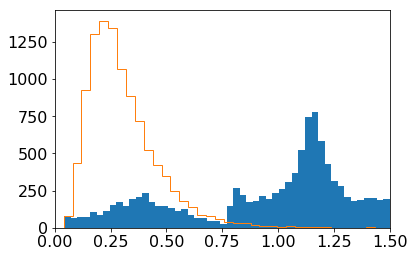

In [352]:
plt.hist(dT_all, bins=50);

logn = np.random.lognormal(mean=-1.3,sigma=0.5, size=len(dT_all))

_ = plt.hist(logn, bins=50, histtype="step");

plt.xlim([0, 1.5])

In [327]:
mu=-1.3
sigma=0.5
np.exp(mu + sigma**2/2)

0.30881897968801986

In [358]:

msname= 'WFD'

df_FoMtgaps = pd.DataFrame(columns=fltpairs_db)

for dbname in dblist_all_v15:

    dataRaw = pd.read_pickle(dataRawDir+'/tgaps_{}_{}.pkl'.format(dbname,msname))
    
    dicFom = {}

    dicFom['db'] = dbname
    
    for fltpair in fltpairs:
        df = dataRaw[dbname][fltpair]
    
        if fltpair[0]==fltpair[1]:
            tmin = 5/60/60/24 # in days
            tmax = 3e8/60./60./24    
            # histogram in log space
            bins=np.logspace(np.log10(tmin), np.log10(tmax), 50)
            
            FoM_tgaps, Nv, Dkl = get_FoM_tgaps(df=df, tmin=tmin, tmax=tmax, bins=bins)
           
        else:
            #tmin = 5/60/60/24
            #tmax = 1.5/24 # 1.5 hour in days
            
            tmin = 5/60/60 # in hour
            tmax = 1.5
    
            #bins=np.logspace(np.log10(tmin), np.log10(tmax), 50)
        
            bins = np.linspace(tmin, tmax, 50)
            FoM_tgaps, Nv, Dkl = get_FoM_tgaps(df=df, tmin=tmin, tmax=tmax, bins=bins, 
                                               unit="hour", ideal='lognormal')
        
        dicFom[fltpair] = FoM_tgaps
        print(dbname, fltpair, FoM_tgaps, Nv, Dkl, np.exp(-Dkl))
        
    df_FoMtgaps = df_FoMtgaps.append(dicFom, ignore_index=True)
    
        
df_FoMtgaps.to_csv("./data/df_tgaps_lognorm_v1.5.csv", index=False)





value sum 2528438
agnddf_v1.5_10yrs.db uu 10773.203214912399 2528438 5.458295132664604 0.004260813678212556
value sum 69489
values 69489.00049000002
values_ 69472
agnddf_v1.5_10yrs.db ug 4570.812168424867 69489 2.7214775601670267 0.0657774923862031
value sum 67903
values 67903.00049000002
values_ 67878
agnddf_v1.5_10yrs.db ur 4522.0503678342375 67903 2.7091147040187185 0.0665957375643821
value sum 9606
values 9606.000489999999
values_ 9601
agnddf_v1.5_10yrs.db ui 2617.9421905742784 9606 1.2999993175211548 0.2725319790312595
value sum 0
agnddf_v1.5_10yrs.db uz nan 0 nan nan
value sum 100
values 100.00048999999999
values_ 99
agnddf_v1.5_10yrs.db uy 1.1956102921063398 100 4.426513426278377 0.011956102921063399
value sum 5227382
agnddf_v1.5_10yrs.db gg 20040.48514311779 5227382 5.563911373454355 0.003833751798341462
value sum 125596
values 125596.00049
values_ 125553
agnddf_v1.5_10yrs.db gr 7565.94682784418 125596 2.809412907983411 0.06024034864043584
value sum 23675
values 23675.000490000

value sum 22380569
alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db yy 51681.40289780827 22380569 6.07085040106754 0.0023092086218991247
value sum 2103640
baseline_2snaps_v1.5_10yrs.db uu 12316.289497177911 2103640 5.140501720990971 0.005854751524584963
value sum 62822
values 62822.00049000002
values_ 62803
baseline_2snaps_v1.5_10yrs.db ug 4065.2371248061345 62822 2.737833256014206 0.06471040598526208
value sum 58841
values 58841.00048999999
values_ 58819
baseline_2snaps_v1.5_10yrs.db ur 3940.013557348738 58841 2.703654726574773 0.0669603432529824
value sum 7395
values 7395.000489999999
values_ 7391
baseline_2snaps_v1.5_10yrs.db ui 2206.2566441293775 7395 1.2095068429644271 0.29834437378355344
value sum 0
baseline_2snaps_v1.5_10yrs.db uz nan 0 nan nan
value sum 51
values 51.00049
values_ 51
baseline_2snaps_v1.5_10yrs.db uy 0.1656272942321098 51 5.729840863094458 0.0032475940045511727
value sum 4479341
baseline_2snaps_v1.5_10yrs.db gg 22573.222852951272 4479341 5.290466842077345 0.005039407103

value sum 26094240
baseline_v1.5_10yrs.db yy 67945.1873629365 26094240 5.950768567363721 0.0026038385238633696
value sum 1877610
bulges_bs_v1.5_10yrs.db uu 8925.009589664693 1877610 5.34889756833329 0.004753388397838045
value sum 60913
values 60913.00049000002
values_ 60888
bulges_bs_v1.5_10yrs.db ug 3833.1556083913956 60913 2.7657582340337634 0.06292836682467447
value sum 52309
values 52309.00048999999
values_ 52294
bulges_bs_v1.5_10yrs.db ur 3348.013568380417 52309 2.7488012350947812 0.06400454163490828
value sum 6068
values 6068.000489999999
values_ 6065
bulges_bs_v1.5_10yrs.db ui 1663.3537392293206 6068 1.2941931723924804 0.2741189418637641
value sum 0
bulges_bs_v1.5_10yrs.db uz nan 0 nan nan
value sum 26
values 26.00049
values_ 26
bulges_bs_v1.5_10yrs.db uy 0.029034820317892007 26 6.797356006664675 0.0011167238583804618
value sum 3879233
bulges_bs_v1.5_10yrs.db gg 21601.674983246594 3879233 5.190621875459303 0.005568542797827971
value sum 100173
values 100173.00049
values_ 100134


value sum 19222466
bulges_cadence_bs_v1.5_10yrs.db yy 71122.6862078731 19222466 5.599428617574871 0.0036999772145713825
value sum 1845901
bulges_cadence_bulge_wfd_v1.5_10yrs.db uu 11109.60699481724 1845901 5.112912555133549 0.006018528076433807
value sum 60821
values 60821.00049000002
values_ 60798
bulges_cadence_bulge_wfd_v1.5_10yrs.db ug 3823.2946462815175 60821 2.7668226003228766 0.06286142362475983
value sum 50754
values 50754.00048999999
values_ 50738
bulges_cadence_bulge_wfd_v1.5_10yrs.db ur 3308.009191751081 50754 2.730643876749337 0.06517731000021833
value sum 6239
values 6239.000489999999
values_ 6238
bulges_cadence_bulge_wfd_v1.5_10yrs.db ui 1840.8620267673134 6239 1.2205859584079246 0.29505722499876796
value sum 0
bulges_cadence_bulge_wfd_v1.5_10yrs.db uz nan 0 nan nan
value sum 91
values 91.00048999999999
values_ 91
bulges_cadence_bulge_wfd_v1.5_10yrs.db uy 1.4919067739982343 91 4.110804490602875 0.01639457993404653
value sum 3827096
bulges_cadence_bulge_wfd_v1.5_10yrs.db g

value sum 16781619
bulges_i_heavy_v1.5_10yrs.db zz 45882.11748079303 16781619 5.9019640154909565 0.002734069786758538
value sum 137166
values 137166.00049
values_ 137126
bulges_i_heavy_v1.5_10yrs.db zy 9927.889331181417 137166 2.625843970470988 0.07237864581005073
value sum 18724662
bulges_i_heavy_v1.5_10yrs.db yy 68007.05815371242 18724662 5.617985261320432 0.003631951175071274
value sum 2238045
daily_ddf_v1.5_10yrs.db uu 12725.501865209342 2238045 5.169749994940269 0.005685990167851559
value sum 65719
values 65719.00049000002
values_ 65700
daily_ddf_v1.5_10yrs.db ug 4181.610820084281 65719 2.7546915410254456 0.06362864346816417
value sum 60213
values 60213.00049000002
values_ 60199
daily_ddf_v1.5_10yrs.db ur 3544.57383758211 60213 2.8324703381563014 0.05886725188218674
value sum 7449
values 7449.00049
values_ 7448
daily_ddf_v1.5_10yrs.db ui 1851.2956217530843 7449 1.392194065142034 0.2485294162643421
value sum 0
daily_ddf_v1.5_10yrs.db uz nan 0 nan nan
value sum 42
values 42.00049
va

value sum 23496010
dcr_nham1_ugr_v1.5_10yrs.db zz 59930.3099747109 23496010 5.971403511746498 0.002550659025711638
value sum 176685
values 176685.00049
values_ 176610
dcr_nham1_ugr_v1.5_10yrs.db zy 11485.702332197136 176685 2.7332654996788968 0.06500666345302168
value sum 25933974
dcr_nham1_ugr_v1.5_10yrs.db yy 90743.58992310293 25933974 5.655271289369342 0.00349902371009946
value sum 2610085
dcr_nham1_ugri_v1.5_10yrs.db uu 18616.347605739265 2610085 4.943097968592279 0.00713246794864507
value sum 44548
values 44548.00049
values_ 44536
dcr_nham1_ugri_v1.5_10yrs.db ug 2668.4788072966285 44548 2.8150586845743018 0.05990120336034454
value sum 57433
values 57433.00049000002
values_ 57420
dcr_nham1_ugri_v1.5_10yrs.db ur 3765.5490196349424 57433 2.724725378449342 0.06556420558972964
value sum 7592
values 7592.00049
values_ 7592
dcr_nham1_ugri_v1.5_10yrs.db ui 2007.294224503977 7592 1.3303074030830855 0.26439597266912235
value sum 0
dcr_nham1_ugri_v1.5_10yrs.db uz nan 0 nan nan
value sum 39
v

value sum 23463365
dcr_nham2_ugr_v1.5_10yrs.db zz 59702.03147254028 23463365 5.973829499721316 0.0025444786573682113
value sum 176241
values 176241.00049
values_ 176187
dcr_nham2_ugr_v1.5_10yrs.db zy 11670.847254815162 176241 2.714758331797528 0.0662209545725181
value sum 25706550
dcr_nham2_ugr_v1.5_10yrs.db yy 88392.41179126357 25706550 5.6727149757304405 0.0034385171013326787
value sum 2801642
dcr_nham2_ugri_v1.5_10yrs.db uu 22116.567992869124 2801642 4.841633942265606 0.007894144931032989
value sum 28651
values 28651.000490000002
values_ 28644
dcr_nham2_ugri_v1.5_10yrs.db ug 2002.1684675941221 28651 2.6609575195655197 0.06988127700932331
value sum 52779
values 52779.00049000002
values_ 52763
dcr_nham2_ugri_v1.5_10yrs.db ur 3669.647659008841 52779 2.6660177325870458 0.06952855603571195
value sum 5559
values 5559.000489999999
values_ 5557
dcr_nham2_ugri_v1.5_10yrs.db ui 1254.2706132316825 5559 1.4888640170168144 0.2256288205129848
value sum 0
dcr_nham2_ugri_v1.5_10yrs.db uz nan 0 nan 

value sum 20649256
filterdist_indx1_v1.5_10yrs.db zz 69893.1701481857 20649256 5.688466633114257 0.0033847791004279135
value sum 154691
values 154691.00049
values_ 154651
filterdist_indx1_v1.5_10yrs.db zy 11347.314931182082 154691 2.612448432769241 0.07335471960994551
value sum 22615356
filterdist_indx1_v1.5_10yrs.db yy 62396.7311370239 22615356 5.892871535173769 0.0027590426229427427
value sum 3045817
filterdist_indx2_v1.5_10yrs.db uu 16568.298503359212 3045817 5.214033312066093 0.005439689417768438
value sum 77889
values 77889.00049000002
values_ 77873
filterdist_indx2_v1.5_10yrs.db ug 4812.435219756285 77889 2.784081497537435 0.0617858133979931
value sum 79106
values 79106.00049000002
values_ 79084
filterdist_indx2_v1.5_10yrs.db ur 5310.226304253807 79106 2.7011542723978312 0.06712798402464804
value sum 11068
values 11068.000489999999
values_ 11066
filterdist_indx2_v1.5_10yrs.db ui 3252.5598393162195 11068 1.2246157327443634 0.293870603479962
value sum 0
filterdist_indx2_v1.5_10yrs.

value sum 23130614
filterdist_indx4_v1.5_10yrs.db zz 45107.23999619779 23130614 6.239869534793707 0.0019501099277432839
value sum 151728
values 151728.00049
values_ 151685
filterdist_indx4_v1.5_10yrs.db zy 10251.239040309933 151728 2.6946908638811355 0.06756326479166622
value sum 25017300
filterdist_indx4_v1.5_10yrs.db yy 66256.7235285874 25017300 5.933785917587926 0.0026484362232769886
value sum 2135817
filterdist_indx5_v1.5_10yrs.db uu 12314.549068419437 2135817 5.155823107800343 0.005765732302167947
value sum 65391
values 65391.00049000002
values_ 65375
filterdist_indx5_v1.5_10yrs.db ug 4030.0517580110254 65391 2.786605415259452 0.06163006771590931
value sum 64720
values 64720.00049000002
values_ 64700
filterdist_indx5_v1.5_10yrs.db ur 4266.6850692689995 64720 2.719233077392154 0.06592529464259889
value sum 9017
values 9017.00049
values_ 9014
filterdist_indx5_v1.5_10yrs.db ui 2416.6068018154406 9017 1.316747276288695 0.2680056340041522
value sum 0
filterdist_indx5_v1.5_10yrs.db uz n

value sum 24482822
filterdist_indx7_v1.5_10yrs.db zz 60600.761578111946 24482822 6.00141954746819 0.002475235966593718
value sum 168139
values 168139.00049
values_ 168078
filterdist_indx7_v1.5_10yrs.db zy 11629.409528658034 168139 2.6712538244195954 0.06916544959026778
value sum 26709266
filterdist_indx7_v1.5_10yrs.db yy 69002.81997312266 26709266 5.958618452444147 0.0025834787063456805
value sum 2561151
filterdist_indx8_v1.5_10yrs.db uu 14785.867152500288 2561151 5.154540243391489 0.005773133701410142
value sum 74725
values 74725.00049000002
values_ 74701
filterdist_indx8_v1.5_10yrs.db ug 4576.489264549385 74725 2.7928825401075312 0.06124441973301284
value sum 68402
values 68402.00049000002
values_ 68384
filterdist_indx8_v1.5_10yrs.db ur 4265.545807611029 68402 2.774831917562858 0.06235995742245883
value sum 9336
values 9336.000489999999
values_ 9331
filterdist_indx8_v1.5_10yrs.db ui 2777.6903077530865 9336 1.212258137156958 0.29752466878246425
value sum 0
filterdist_indx8_v1.5_10yrs.

value sum 28920897
footprint_big_sky_dustv1.5_10yrs.db ii 77728.3448189718 28920897 5.91909970335332 0.002687618742218535
value sum 204882
values 204882.00049
values_ 204825
footprint_big_sky_dustv1.5_10yrs.db iz 15816.337089114531 204882 2.5613908048430964 0.07719729936799978
value sum 37247
values 37247.000490000006
values_ 37235
footprint_big_sky_dustv1.5_10yrs.db iy 4224.097117198101 37247 2.1767658667689775 0.11340771383462027
value sum 23218425
footprint_big_sky_dustv1.5_10yrs.db zz 77394.51366192696 23218425 5.703785528331468 0.0033333231544313176
value sum 169293
values 169293.00049
values_ 169234
footprint_big_sky_dustv1.5_10yrs.db zy 12685.669821553978 169293 2.5911579456835083 0.07493322122919423
value sum 25551501
footprint_big_sky_dustv1.5_10yrs.db yy 93488.03024828371 25551501 5.6106179320954865 0.0036588077642986105
value sum 2895466
footprint_big_sky_nouiyv1.5_10yrs.db uu 16260.84692863971 2895466 5.182141154842658 0.005615968872934343
value sum 74074
values 74074.00049

value sum 25558367
footprint_big_wfdv1.5_10yrs.db ii 64943.148871177 25558367 5.9752077631314835 0.002540974111185468
value sum 212792
values 212792.00048999995
values_ 212728
footprint_big_wfdv1.5_10yrs.db iz 15717.262315206439 212792 2.605555543917875 0.07386209216138971
value sum 38423
values 38423.000490000006
values_ 38412
footprint_big_wfdv1.5_10yrs.db iy 4390.975073201098 38423 2.1691049238527893 0.11427986032327246
value sum 20441253
footprint_big_wfdv1.5_10yrs.db zz 51240.78543915415 20441253 5.988774538264615 0.0025067340754088875
value sum 176199
values 176199.00049
values_ 176138
footprint_big_wfdv1.5_10yrs.db zy 12843.180051869691 176199 2.6188011029287175 0.07289019830912599
value sum 23066577
footprint_big_wfdv1.5_10yrs.db yy 64591.2244505641 23066577 5.878061408504504 0.0028002084769909335
value sum 2569369
footprint_bluer_footprintv1.5_10yrs.db uu 12841.82799255864 2569369 5.298707967300874 0.004998047377608525
value sum 125295
values 125295.00049
values_ 125262
footpr

value sum 19007749
footprint_newAv1.5_10yrs.db ii 54019.64479128543 19007749 5.8632542442697915 0.002841980120385924
value sum 158513
values 158513.00049
values_ 158459
footprint_newAv1.5_10yrs.db iz 11343.414677349774 158513 2.6371992379766325 0.07156141564004072
value sum 25983
values 25983.000490000002
values_ 25978
footprint_newAv1.5_10yrs.db iy 2931.802186105866 25983 2.181825163490365 0.11283539953453665
value sum 14236488
footprint_newAv1.5_10yrs.db zz 52436.85609973857 14236488 5.603953820567665 0.0036832718926000972
value sum 122291
values 122291.00049
values_ 122261
footprint_newAv1.5_10yrs.db zy 8783.56898720138 122291 2.633520634829602 0.07182514647195118
value sum 16071872
footprint_newAv1.5_10yrs.db yy 48503.598045267245 16071872 5.803187960609671 0.0030179183884283824
value sum 1871291
footprint_newBv1.5_10yrs.db uu 11034.304203415002 1871291 5.133374861870589 0.00589662655536472
value sum 57876
values 57876.00049000002
values_ 57855
footprint_newBv1.5_10yrs.db ug 3885.5

value sum 29570603
footprint_standard_goalsv1.5_10yrs.db ii 73189.45250389079 29570603 6.001484685819896 0.002475074739053877
value sum 205957
values 205957.00049
values_ 205876
footprint_standard_goalsv1.5_10yrs.db iz 15501.574735942067 205957 2.5867257945048028 0.07526607367529177
value sum 37875
values 37875.000490000006
values_ 37861
footprint_standard_goalsv1.5_10yrs.db iy 4644.7513711821675 37875 2.0985534191142454 0.12263369956916613
value sum 23662151
footprint_standard_goalsv1.5_10yrs.db zz 58472.63975293381 23662151 6.003073098030639 0.0024711464208361194
value sum 175866
values 175866.00049
values_ 175818
footprint_standard_goalsv1.5_10yrs.db zy 13594.061596710866 175866 2.5600892913341537 0.0772978381080531
value sum 26212419
footprint_standard_goalsv1.5_10yrs.db yy 67710.79827750388 26212419 5.958742915994123 0.00258315717742433
value sum 3519023
footprint_stuck_rollingv1.5_10yrs.db uu 8684.344566967062 3519023 6.0044167436488305 0.0024678283054606525
value sum 74762
value

value sum 29614313
goodseeing_gri_v1.5_10yrs.db ii 80848.57015651756 29614313 5.903435170010326 0.0027300505048527567
value sum 202004
values 202004.00049
values_ 201932
goodseeing_gri_v1.5_10yrs.db iz 15360.729245673772 202004 2.5764732956609278 0.07604170831109172
value sum 32830
values 32830.00049
values_ 32818
goodseeing_gri_v1.5_10yrs.db iy 3999.708532341228 32830 2.105121239963226 0.12183090259948913
value sum 23491985
goodseeing_gri_v1.5_10yrs.db zz 60713.188256900175 23491985 5.958253634189935 0.002584421378478667
value sum 161059
values 161059.00049
values_ 161004
goodseeing_gri_v1.5_10yrs.db zy 12523.079607538924 161059 2.5541974470137663 0.07775460922729512
value sum 25909285
goodseeing_gri_v1.5_10yrs.db yy 91835.14828104872 25909285 5.642361574426871 0.0035444879424904514
value sum 2466808
goodseeing_griz_v1.5_10yrs.db uu 14228.70978283869 2466808 5.1554185469985745 0.005768065363351623
value sum 69098
values 69098.00049000002
values_ 69081
goodseeing_griz_v1.5_10yrs.db ug 

value sum 29719923
goodseeing_i_v1.5_10yrs.db ii 62197.640539354485 29719923 6.169255842405676 0.0020927927888425043
value sum 209198
values 209198.00049
values_ 209125
goodseeing_i_v1.5_10yrs.db iz 14789.951182294402 209198 2.6493331959222024 0.07069833928763374
value sum 32454
values 32454.00049
values_ 32450
goodseeing_i_v1.5_10yrs.db iy 4020.967417964685 32454 2.0883011772032827 0.12389743692502264
value sum 23587351
goodseeing_i_v1.5_10yrs.db zz 81610.37273520548 23587351 5.666509502007306 0.003459921071052255
value sum 159135
values 159135.00049
values_ 159082
goodseeing_i_v1.5_10yrs.db zy 12218.84321736054 159135 2.5667736123805116 0.0767828775402051
value sum 25989824
goodseeing_i_v1.5_10yrs.db yy 91553.15040336597 25989824 5.648540673415241 0.003522653727988538
value sum 2508390
greedy_footprint_v1.5_10yrs.db uu 11238.505111160744 2508390 5.408050553662974 0.0044803659363818
value sum 74670
values 74670.00049000002
values_ 74652
greedy_footprint_v1.5_10yrs.db ug 4753.788472129

value sum 28970246
rolling_mod2_sdf_0.10_v1.5_10yrs.db ii 67328.06700212909 28970246 6.064447389435674 0.0023240419498726066
value sum 207794
values 207794.00049
values_ 207733
rolling_mod2_sdf_0.10_v1.5_10yrs.db iz 18691.39563247017 207794 2.408483912967102 0.08995156564900895
value sum 38018
values 38018.000490000006
values_ 38010
rolling_mod2_sdf_0.10_v1.5_10yrs.db iy 5125.90384499352 38018 2.0037528623103507 0.1348283403912231
value sum 23396530
rolling_mod2_sdf_0.10_v1.5_10yrs.db zz 87380.75857642092 23396530 5.590067894915094 0.0037347742838968394
value sum 176653
values 176653.00049
values_ 176598
rolling_mod2_sdf_0.10_v1.5_10yrs.db zy 13931.709996863057 176653 2.540019819722256 0.07886483669602587
value sum 26247101
rolling_mod2_sdf_0.10_v1.5_10yrs.db yy 78273.68786793646 26247101 5.815099319859081 0.0029821841226555443
value sum 2593324
rolling_mod2_sdf_0.20_v1.5_10yrs.db uu 11716.211246314413 2593324 5.399722270139851 0.0045178355062130355
value sum 77066
values 77066.0004900

value sum 28503053
rolling_mod3_sdf_0.20_v1.5_10yrs.db rr 115073.73561692951 28503053 5.512193381153233 0.004037242453183156
value sum 198820
values 198820.00049
values_ 198759
rolling_mod3_sdf_0.20_v1.5_10yrs.db ri 27475.567769265694 198820 1.9791027277664044 0.13819317860006888
value sum 18408
values 18408.000490000002
values_ 18402
rolling_mod3_sdf_0.20_v1.5_10yrs.db rz 2953.8967143484547 18408 1.8296601339106953 0.1604680961727757
value sum 4235
values 4235.000489999999
values_ 4233
rolling_mod3_sdf_0.20_v1.5_10yrs.db ry 1461.3269849206908 4235 1.0640384113963255 0.3450595005715917
value sum 29202147
rolling_mod3_sdf_0.20_v1.5_10yrs.db ii 101330.66625612402 29202147 5.663608420399769 0.0034699731583477072
value sum 212819
values 212819.00049
values_ 212753
rolling_mod3_sdf_0.20_v1.5_10yrs.db iz 18126.14387855284 212819 2.4630867299058443 0.08517164293861376
value sum 38916
values 38916.000490000006
values_ 38904
rolling_mod3_sdf_0.20_v1.5_10yrs.db iy 6034.767782488455 38916 1.86386

value sum 37937787
short_exp_2ns_1expt_v1.5_10yrs.db rr 407702.35224819736 37937787 4.53316553348228 0.010746603439156779
value sum 259622
values 259622.00049
values_ 259534
short_exp_2ns_1expt_v1.5_10yrs.db ri 23997.867243832825 259622 2.3812617654429946 0.09243387403160297
value sum 16735
values 16735.000490000002
values_ 16729
short_exp_2ns_1expt_v1.5_10yrs.db rz 1189.10014653626 16735 2.6443054929689858 0.07105468458537556
value sum 1962
values 1962.0004900000001
values_ 1962
short_exp_2ns_1expt_v1.5_10yrs.db ry 611.7568563287648 1962 1.165384730135436 0.3118026790666487
value sum 38353754
short_exp_2ns_1expt_v1.5_10yrs.db ii 342352.65062445734 38353754 4.718766341902074 0.008926183617500841
value sum 275618
values 275618.00049000006
values_ 275545
short_exp_2ns_1expt_v1.5_10yrs.db iz 20948.001302038916 275618 2.576972610480207 0.07600374903685142
value sum 43917
values 43917.000490000006
values_ 43901
short_exp_2ns_1expt_v1.5_10yrs.db iy 5482.747144153012 43917 2.080695209830614 0

value sum 46460362
short_exp_5ns_5expt_v1.5_10yrs.db rr 476648.4464744292 46460362 4.579575588267014 0.01025924951842668
value sum 365746
values 365746.00049000006
values_ 365634
short_exp_5ns_5expt_v1.5_10yrs.db ri 30077.744945786377 365746 2.498153575694719 0.08223670237210079
value sum 18024
values 18024.000490000002
values_ 18018
short_exp_5ns_5expt_v1.5_10yrs.db rz 1432.8195156677978 18024 2.532060010808005 0.07949509074943396
value sum 2594
values 2594.00049
values_ 2594
short_exp_5ns_5expt_v1.5_10yrs.db ry 720.946685617547 2594 1.2803911753774562 0.27792856037684927
value sum 47134757
short_exp_5ns_5expt_v1.5_10yrs.db ii 464535.79916801647 47134757 4.619727322798723 0.009855483060367034
value sum 354268
values 354268.00049000006
values_ 354144
short_exp_5ns_5expt_v1.5_10yrs.db iz 21779.682059656967 354268 2.7890761692673007 0.06147798293850127
value sum 44287
values 44287.000490000006
values_ 44269
short_exp_5ns_5expt_v1.5_10yrs.db iy 5061.916755809202 44287 2.1689459631939396 0

value sum 29186938
third_obs_pt15v1.5_10yrs.db rr 89450.08893364633 29186938 5.787795755226195 0.003064730152016848
value sum 180466
values 180466.00049
values_ 180407
third_obs_pt15v1.5_10yrs.db ri 18076.585691217508 180466 2.3009249017605744 0.10016615701138999
value sum 14403
values 14403.00049
values_ 14399
third_obs_pt15v1.5_10yrs.db rz 915.1993796010586 14403 2.756049854457205 0.0635422744984419
value sum 2043
values 2043.0004900000001
values_ 2043
third_obs_pt15v1.5_10yrs.db ry 586.3333352616058 2043 1.248286135459477 0.28699624829251386
value sum 29609453
third_obs_pt15v1.5_10yrs.db ii 59167.427038622765 29609453 6.215477775914526 0.001998261401135062
value sum 206627
values 206627.00049
values_ 206539
third_obs_pt15v1.5_10yrs.db iz 15195.185836883986 206627 2.6099365790373565 0.07353920754249922
value sum 38139
values 38139.000490000006
values_ 38126
third_obs_pt15v1.5_10yrs.db iy 4589.572874087874 38139 2.1174504166478725 0.12033804961031684
value sum 23694537
third_obs_pt15v

value sum 29354035
third_obs_pt60v1.5_10yrs.db rr 108681.91982214531 29354035 5.598759845202585 0.0037024524847144628
value sum 184631
values 184631.00049
values_ 184572
third_obs_pt60v1.5_10yrs.db ri 15160.539560872421 184631 2.499663267963416 0.0821126439269268
value sum 14268
values 14268.00049
values_ 14262
third_obs_pt60v1.5_10yrs.db rz 994.2432533021961 14268 2.6637926481296743 0.0696834351907903
value sum 1746
values 1746.0004900000001
values_ 1745
third_obs_pt60v1.5_10yrs.db ry 445.60534397010514 1746 1.3656490551068032 0.2552149736369445
value sum 29608507
third_obs_pt60v1.5_10yrs.db ii 89189.5660721396 29608507 5.805052937210978 0.0030122952863560325
value sum 200702
values 200702.00049
values_ 200640
third_obs_pt60v1.5_10yrs.db iz 13408.83959765269 200702 2.7059070599388098 0.06680969595545978
value sum 34781
values 34781.000490000006
values_ 34767
third_obs_pt60v1.5_10yrs.db iy 4379.349793207863 34781 2.0721709963398087 0.12591212999073811
value sum 23719862
third_obs_pt60v

value sum 40981220
twilight_neo_mod2_v1.5_10yrs.db rr 1641087.5614839473 40981220 3.21775474368999 0.04004486839298457
value sum 179134
values 179134.00049
values_ 179077
twilight_neo_mod2_v1.5_10yrs.db ri 15427.124116199251 179134 2.4520068627436373 0.08612058077304839
value sum 16236
values 16236.00049
values_ 16231
twilight_neo_mod2_v1.5_10yrs.db rz 1152.6829691133285 16236 2.6451387572390312 0.07099550191631734
value sum 2603
values 2603.00049
values_ 2601
twilight_neo_mod2_v1.5_10yrs.db ry 456.5392758215865 2603 1.7407451718114602 0.17538965648159296
value sum 41051632
twilight_neo_mod2_v1.5_10yrs.db ii 1056079.8294347147 41051632 3.6602668130203804 0.025725647872774333
value sum 189855
values 189855.00049
values_ 189799
twilight_neo_mod2_v1.5_10yrs.db iz 13468.144574016236 189855 2.645933387039869 0.07093910918340963
value sum 35836
values 35836.000490000006
values_ 35825
twilight_neo_mod2_v1.5_10yrs.db iy 4184.887543302831 35836 2.1474731425282134 0.11677886882751508
value sum 3

value sum 27111592
u60_v1.5_10yrs.db rr 83010.98732951078 27111592 5.7887436879872665 0.003061826370414204
value sum 172463
values 172463.00049
values_ 172409
u60_v1.5_10yrs.db ri 17726.845475189708 172463 2.275102536635553 0.10278636852652283
value sum 14552
values 14552.000489999999
values_ 14549
u60_v1.5_10yrs.db rz 849.8872922410467 14552 2.840379976868878 0.05840346978017088
value sum 1654
values 1654.0004900000001
values_ 1654
u60_v1.5_10yrs.db ry 319.24818839178823 1654 1.6449830552625364 0.19301583336867487
value sum 27656722
u60_v1.5_10yrs.db ii 56259.31438369835 27656722 6.197652471291669 0.002034200379339907
value sum 202772
values 202772.00049
values_ 202702
u60_v1.5_10yrs.db iz 14862.137341280411 202772 2.613265334327658 0.07329482049435036
value sum 36986
values 36986.000490000006
values_ 36965
u60_v1.5_10yrs.db iy 4317.548891842858 36986 2.147851607578584 0.11673468046944407
value sum 22359157
u60_v1.5_10yrs.db zz 57018.27038719383 22359157 5.971619475722638 0.0025501082

value sum 19040359
wfd_depth_scale0.65_v1.5_10yrs.db rr 64611.69291002192 19040359 5.685920764001354 0.0033934072834457545
value sum 146961
values 146961.00049
values_ 146917
wfd_depth_scale0.65_v1.5_10yrs.db ri 12328.665554946267 146961 2.4782401616354326 0.08389072988715555
value sum 12487
values 12487.000489999999
values_ 12483
wfd_depth_scale0.65_v1.5_10yrs.db rz 530.5985925001731 12487 3.1584375930720667 0.04249207916234269
value sum 1064
values 1064.0004900000001
values_ 1064
wfd_depth_scale0.65_v1.5_10yrs.db ry 219.57623680088955 1064 1.5780911774106878 0.2063686436098586
value sum 19241732
wfd_depth_scale0.65_v1.5_10yrs.db ii 55782.44152877383 19241732 5.843377589032292 0.002899034324393138
value sum 171061
values 171061.00049
values_ 171011
wfd_depth_scale0.65_v1.5_10yrs.db iz 12419.172932204634 171061 2.622778735359491 0.07260084374699455
value sum 28698
values 28698.000489999995
values_ 28686
wfd_depth_scale0.65_v1.5_10yrs.db iy 3301.1463544781714 28698 2.162557645631393 0.1

value sum 4680323
wfd_depth_scale0.75_noddf_v1.5_10yrs.db gg 18763.383124011925 4680323 5.519215139203992 0.004008993209231911
value sum 121213
values 121213.00049
values_ 121165
wfd_depth_scale0.75_noddf_v1.5_10yrs.db gr 7357.267278084026 121213 2.801860758553652 0.060697014990834526
value sum 24310
values 24310.000490000002
values_ 24296
wfd_depth_scale0.75_noddf_v1.5_10yrs.db gi 703.7893883766435 24310 3.5421639201483965 0.028950612438364602
value sum 998
values 998.0004900000001
values_ 998
wfd_depth_scale0.75_noddf_v1.5_10yrs.db gz 479.5343323077501 998 0.7329377843264313 0.48049532295365743
value sum 446
values 446.00049
values_ 446
wfd_depth_scale0.75_noddf_v1.5_10yrs.db gy 218.28414811039778 446 0.7145213062615723 0.48942634105470356
value sum 24968449
wfd_depth_scale0.75_noddf_v1.5_10yrs.db rr 78919.5404181025 24968449 5.756939409059204 0.0031607706356971753
value sum 176848
values 176848.00049
values_ 176775
wfd_depth_scale0.75_noddf_v1.5_10yrs.db ri 15626.418288929386 176848

value sum 4568409
wfd_depth_scale0.80_v1.5_10yrs.db gg 24326.201204554185 4568409 5.235366274894643 0.005324873759016364
value sum 116003
values 116003.00049
values_ 115968
wfd_depth_scale0.80_v1.5_10yrs.db gr 6782.016307872289 116003 2.8393416045587747 0.058464145822713975
value sum 22304
values 22304.000490000002
values_ 22297
wfd_depth_scale0.80_v1.5_10yrs.db gi 725.3218817950733 22304 3.4259057823435093 0.03251981177345199
value sum 687
values 687.0004900000001
values_ 687
wfd_depth_scale0.80_v1.5_10yrs.db gz 411.2413991636296 687 0.5131539042492969 0.598604656715618
value sum 294
values 294.00049
values_ 294
wfd_depth_scale0.80_v1.5_10yrs.db gy 136.19738095804658 294 0.7694746031910744 0.463256397816485
value sum 24606365
wfd_depth_scale0.80_v1.5_10yrs.db rr 78938.79367337706 24606365 5.74208763973604 0.0032080639978061395
value sum 166560
values 166560.00049
values_ 166510
wfd_depth_scale0.80_v1.5_10yrs.db ri 15413.934738852682 166560 2.38008365140767 0.09254283584805885
value su

value sum 5930715
wfd_depth_scale0.90_noddf_v1.5_10yrs.db gg 21605.21724330066 5930715 5.614965233513248 0.0036429363480289744
value sum 137693
values 137693.00049
values_ 137657
wfd_depth_scale0.90_noddf_v1.5_10yrs.db gr 7944.268578532297 137693 2.852575834142831 0.057695515229766924
value sum 27588
values 27588.000490000002
values_ 27579
wfd_depth_scale0.90_noddf_v1.5_10yrs.db gi 783.703146274471 27588 3.5611058658590142 0.028407392571932397
value sum 1212
values 1212.0004900000001
values_ 1212
wfd_depth_scale0.90_noddf_v1.5_10yrs.db gz 542.0382240055945 1212 0.8046906436807517 0.44722625743035854
value sum 530
values 530.0004900000001
values_ 530
wfd_depth_scale0.90_noddf_v1.5_10yrs.db gy 312.3109339504181 530 0.5288777318215983 0.5892659131139963
value sum 32342918
wfd_depth_scale0.90_noddf_v1.5_10yrs.db rr 93688.96265398925 32342918 5.844169970087988 0.0028967380943794017
value sum 200782
values 200782.00049
values_ 200716
wfd_depth_scale0.90_noddf_v1.5_10yrs.db ri 19841.319193874

value sum 2532896
wfd_depth_scale0.95_v1.5_10yrs.db uu 14008.89683907773 2532896 5.197425974841323 0.005530782487349552
value sum 71162
values 71162.00049000002
values_ 71138
wfd_depth_scale0.95_v1.5_10yrs.db ug 4367.496104603814 71162 2.7907690969595986 0.06137399320710231
value sum 68631
values 68631.00049000002
values_ 68613
wfd_depth_scale0.95_v1.5_10yrs.db ur 4420.348588403302 68631 2.7425257685673277 0.06440746293079369
value sum 9313
values 9313.000489999999
values_ 9305
wfd_depth_scale0.95_v1.5_10yrs.db ui 2948.3095173108086 9313 1.150179312420206 0.3165799975637076
value sum 0
wfd_depth_scale0.95_v1.5_10yrs.db uz nan 0 nan nan
value sum 46
values 46.00049
values_ 46
wfd_depth_scale0.95_v1.5_10yrs.db uy 0.1316991433104565 46 5.855876571599216 0.0028630248545751416
value sum 5655328
wfd_depth_scale0.95_v1.5_10yrs.db gg 27951.57774640719 5655328 5.309879741741044 0.004942521060919401
value sum 135359
values 135359.00049
values_ 135326
wfd_depth_scale0.95_v1.5_10yrs.db gr 8328.651

value sum 27759127
wfd_depth_scale0.99_v1.5_10yrs.db zz 65073.39023037098 27759127 6.055804252568518 0.002344216020567613
value sum 188874
values 188874.00049
values_ 188821
wfd_depth_scale0.99_v1.5_10yrs.db zy 13933.754020698505 188874 2.606765882792035 0.0737727480791348
value sum 30296046
wfd_depth_scale0.99_v1.5_10yrs.db yy 96009.9633238451 30296046 5.754320517226764 0.003169059200789605


In [73]:

tmin = 5/60/60/24 # in days
tmax = 3e8/60./60./24    
# histogram in log space
bins_log=np.logspace(np.log10(tmin), np.log10(tmax), 50)
            
#tmin = 5/60/60/24
#tmax = 1.5/24 # 1.5 hour in days
#bins_lin = np.linspace(tmin, tmax, 50)

tmin = 5/60 # in min
tmax = 1.5 * 60
    
bins_log2=np.logspace(np.log10(tmin), np.log10(tmax), 50)


### plot

In [74]:
# prepare filter_dict

dbname = 'baseline_v1.5_10yrs.db'
msname= 'WFD'

dataRaw = pd.read_pickle(dataRawDir+'/tgaps_{}_{}.pkl'.format(dbname,msname))

fltpairs = ['uu', 'ug', 'ur', 'ui', 'uz', 'uy', 'gg', 'gr', 'gi', 'gz', 'gy',
           'rr', 'ri', 'rz', 'ry', 'ii', 'iz', 'iy', 'zz', 'zy', 'yy' ]

filter_dict = {}
for fltpair in fltpairs:
    filter_dict[fltpair] = {}
    df = dataRaw[dbname][fltpair]
    dT = np.concatenate( df ['dT_lim'].values )
    
    filter_dict[fltpair]['dT'] = dT
    
    if fltpair[0]==fltpair[1]:
        bins = bins_log
        values, bins_ = np.histogram(dT, bins=bins);
    else:
        dT = dT * 24*60
        bins = bins_log2
        values, bins_ = np.histogram(dT, bins=bins);

    Dkl = get_Dkl(values)
    
    filter_dict[fltpair]['Dkl'] = Dkl
    print(fltpair, len(dT),  Dkl)

uu 2468080 5.398810362201651
ug 70578 10.087027837354611
ur 66368 9.935909402548146
ui 9339 8.28940940309263
uz 0 nan
uy 50 8.221146055990351
gg 5330741 5.312331831053857
gr 127608 10.311776022270775
gi 24946 10.014700307192422
gz 987 7.3889687726673285
gy 494 6.708886472548894
rr 29186938 5.787795755226195
ri 180466 10.405803677739307
rz 14403 9.498195464109079
ry 2043 7.706359109460154
ii 29609453 6.215477775914526
iz 206627 10.547239883847002
iy 38139 9.430703136183368
zz 23694537 6.00344538601065
zy 174632 10.423314297878491
yy 26094240 5.950768567363721


uu 2468080
ug 70578
ur 66368
ui 9339
uz 0
uy 50
gg 5330741
gr 127608
gi 24946
gz 987
gy 494
rr 29186938
ri 180466
rz 14403
ry 2043
ii 29609453
iz 206627
iy 38139
zz 23694537
zy 174632
yy 26094240


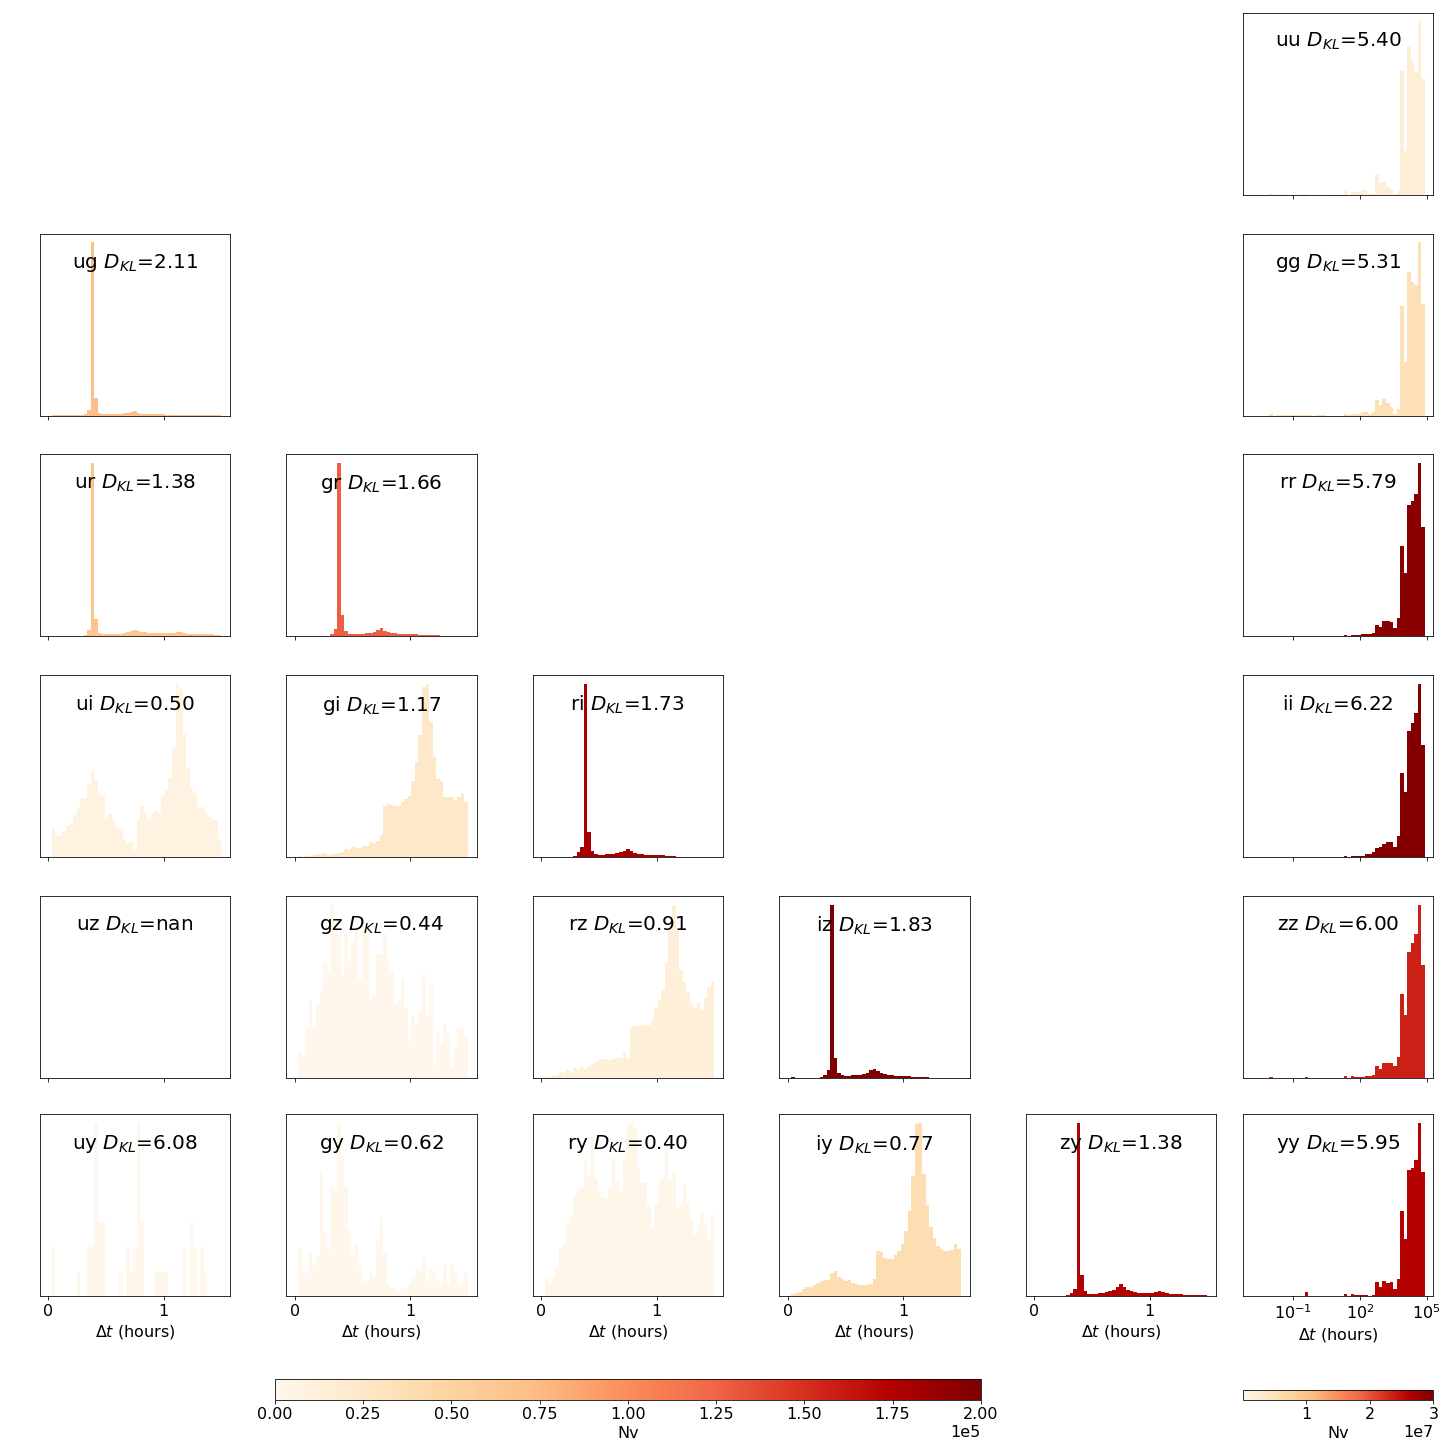

In [27]:
tmin = 5/60/60 # in hour
tmax = 3e8/60./60.   
# histogram in log space
bins_log=np.logspace(np.log10(tmin), np.log10(tmax), 50)
            
tmin = 5/60/60
tmax = 1.5 # 1.5 hour in days
bins_lin = np.linspace(tmin, tmax, 50)


plot_hist_colorbar(filter_dict, figsize=(20, 20), histbins=[bins_log, bins_lin], 
                   cumulative=False, density=False, histtype='stepfilled')



Text(0, 0.5, 'Nv (M)')

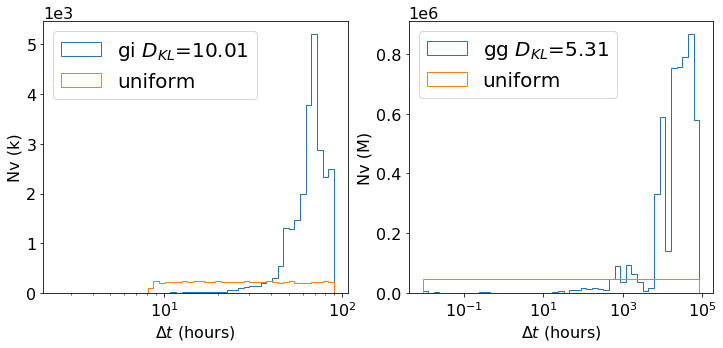

In [77]:
# plot a distribution with uniform one 

key = 'gi'
dT = filter_dict[key]['dT'] * 24 * 60
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

dkltex = '$D_{KL}$'
title = '{} {}={:.2f}'.format(key, dkltex, filter_dict[key] ['Dkl'])

#uni = np.random.uniform(low=dT.min(), high=dT.max(), size=len(dT) )

#bins_lin = np.linspace(dT.min(), dT.max(), 50)


low = np.log(dT.min())
high = np.log(dT.max())
uni = np.power(10, np.random.uniform(low=low, high=high, size=len(dT) ) )

tmin = dT.min()
tmax = dT.max()
bins_log=np.logspace(np.log10(tmin), np.log10(tmax), 50)


ax = axs[0]
_ = ax.hist(dT, bins=bins_log, label=title, 
                          cumulative=False, density=False, histtype='step' );
_ = ax.hist(uni, bins=bins_log, label='uniform', alpha=1,
                          cumulative=False, density=False, histtype='step'  );
ax.legend(loc='upper left')
ax.set_xlabel('$\Delta t$ (hours)')
ax.set_ylabel('Nv (k)')
ax.ticklabel_format(axis='y', style='scientific', scilimits=(0,0), )
ax.set_xscale('log')

# --------------------------
key = 'gg'
dT = filter_dict[key]['dT'] * 24

low = np.log(dT.min())
high = np.log(dT.max())
uni = np.power(10, np.random.uniform(low=low, high=high, size=len(dT) ) )

title = '{} {}={:.2f}'.format(key, dkltex, filter_dict[key] ['Dkl'])


tmin = dT.min()
tmax = dT.max()
bins_log=np.logspace(np.log10(tmin), np.log10(tmax), 50)

ax = axs[1]
_ = ax.hist(dT, bins=bins_log, label=title, 
                          cumulative=False, density=False, histtype='step' );

_ = ax.hist(uni, bins=bins_log, label='uniform', alpha=1,
                          cumulative=False, density=False, histtype='step'  );
ax.set_xscale('log')
ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), )
ax.legend(loc='upper left')
ax.set_xlabel('$\Delta t$ (hours)')
ax.set_ylabel('Nv (M)')

# fig.suptitle(title)

In [26]:
def plot_hist_colorbar(filter_dict, figsize=(20, 20), histbins=[50, 50], vmax=10000, **kwargs):
    """plot histogram
    Inputs:
        filter_dict: ['uu']['dT']
        
    """
    #fig, axs = plt.subplots(6, 6, figsize=figsize, constrained_layout=True); # 6 axes on a 2x3 grid
    fig, axs = plt.subplots(6, 6, figsize=figsize, constrained_layout=True);
    flt = ['u', 'g', 'r', 'i', 'z', 'y']
    fdict = {'u':0, 'g':1, 'r':2, 'i':3, 'z':4, 'y':5}
    cmap = matplotlib.cm.OrRd
    for i, f0 in enumerate(flt):
        for f1 in flt[i:]:
            key = '{}{}'.format(f0, f1)
            dT = filter_dict[key] ['dT']
            #eDkl = filter_dict[key] ['eDkl']
            
            #title = '{}{} Nv={} $D_k$={:.2f}'.format(f0, f1, len(dT), filter_dict[key] ['Dkl'])                   
            dkltex = '$D_{KL}$'
            title = '{} {}={:.2f}'.format(key, dkltex, filter_dict[key] ['Dkl'])

            if f0==f1:
                vmin1 = 100000
                vmax1 = 30000000
                norm = matplotlib.colors.Normalize(vmin=vmin1, vmax=vmax1)
                m1 = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
                
                ax = axs[fdict[f0], 5]
                axs[fdict[f0], fdict[f1]].axis('off')
                # plot distribution
                Nv = len(dT)
                if Nv!=0:
                    values, bins, _ = ax.hist(dT*24, bins=histbins[0], color=m1.to_rgba(Nv), label=title, **kwargs );
                    ax.legend(loc='upper center', handlelength=0, handletextpad=0, frameon=False)
                ax.set_xscale("log")
                
            else:
                axs[fdict[f0], fdict[f1]].axis('off')
                ax = axs[fdict[f1], fdict[f0]]
                
                vmin2 = 0
                vmax2 = 200000
                norm = matplotlib.colors.Normalize(vmin=vmin2, vmax=vmax2)
                m2 = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

                # plot distribution
                Nv = len(dT)
                #if Nv!=0:
                values, bins, _ = ax.hist(dT*24, bins=histbins[1], color=m2.to_rgba(Nv), label=title, **kwargs );
                ax.legend(loc='upper center', handlelength=0, handletextpad=0, frameon=False)
            
            # ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

            # ax.set_title(title)
            
            if fdict[f1]!=5:
                ax.get_xaxis().set_ticklabels([])
                
            ax.get_yaxis().set_ticks([])
            #ax.set_ylabel('N fields')
            print(key, Nv)
    for i in range(6):
        #axs[i, i].axis('off')
        axs[i, 5].axis('on')    
        axs[5, i].set_xlabel('$\Delta t$ (hours)')
          
    # cbar diagonal
    m1.set_array(np.linspace(vmin1, vmax1) ) 
    cbar1 = fig.colorbar(mappable=m1, ax=axs[:,5], shrink=1, location='bottom')
    cbar1.set_label('Nv')
    #cbar1.formatter.set_powerlimits((0, 0))
    #cbar1.update_ticks()

    # for off diagonal
    m2.set_array(np.linspace(vmin2, vmax2) ) 
    cbar2 = fig.colorbar(mappable=m2, ax=axs[:,:5], shrink=.6, location='bottom')
    cbar2.set_label('Nv')
    cbar2.set_clim([0, vmax2])

    cbar2.formatter.set_powerlimits((0, 0))
    cbar2.update_ticks()
    
    #fig.suptitle(dbfile, fontsize=16)
    #fig.savefig('{}.png'.format(filename), dpi=200)
    #fig.tight_layout( pad=1.0 )


